# Trabajando con Neurokit2

In [1]:
!pip install neurokit2 seaborn

In [36]:
import neurokit2 as nk


Procesando archivo: 1D_basal.txt


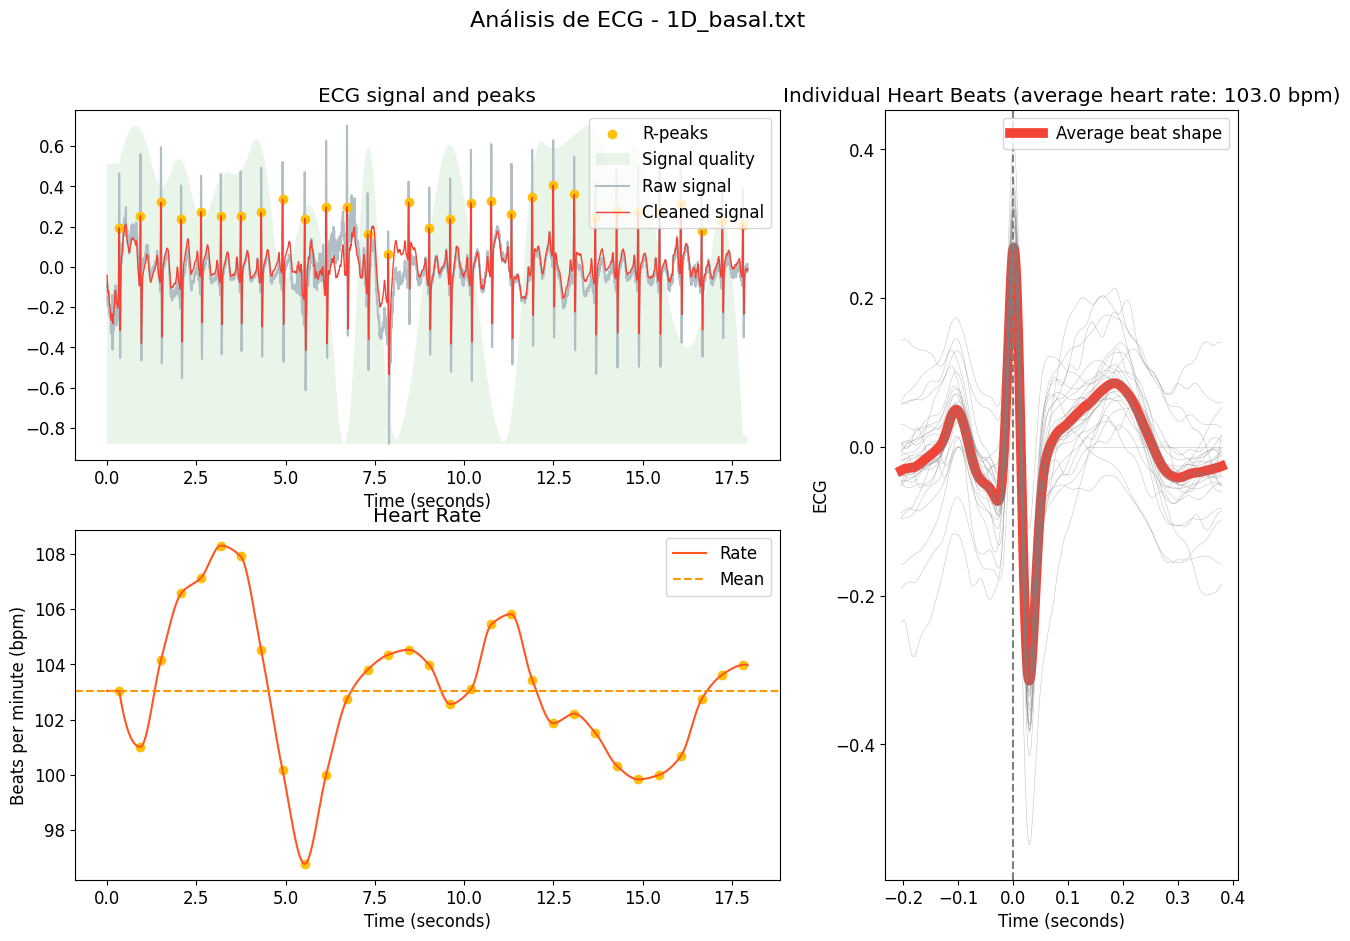

Procesando archivo: 2D_basal.txt


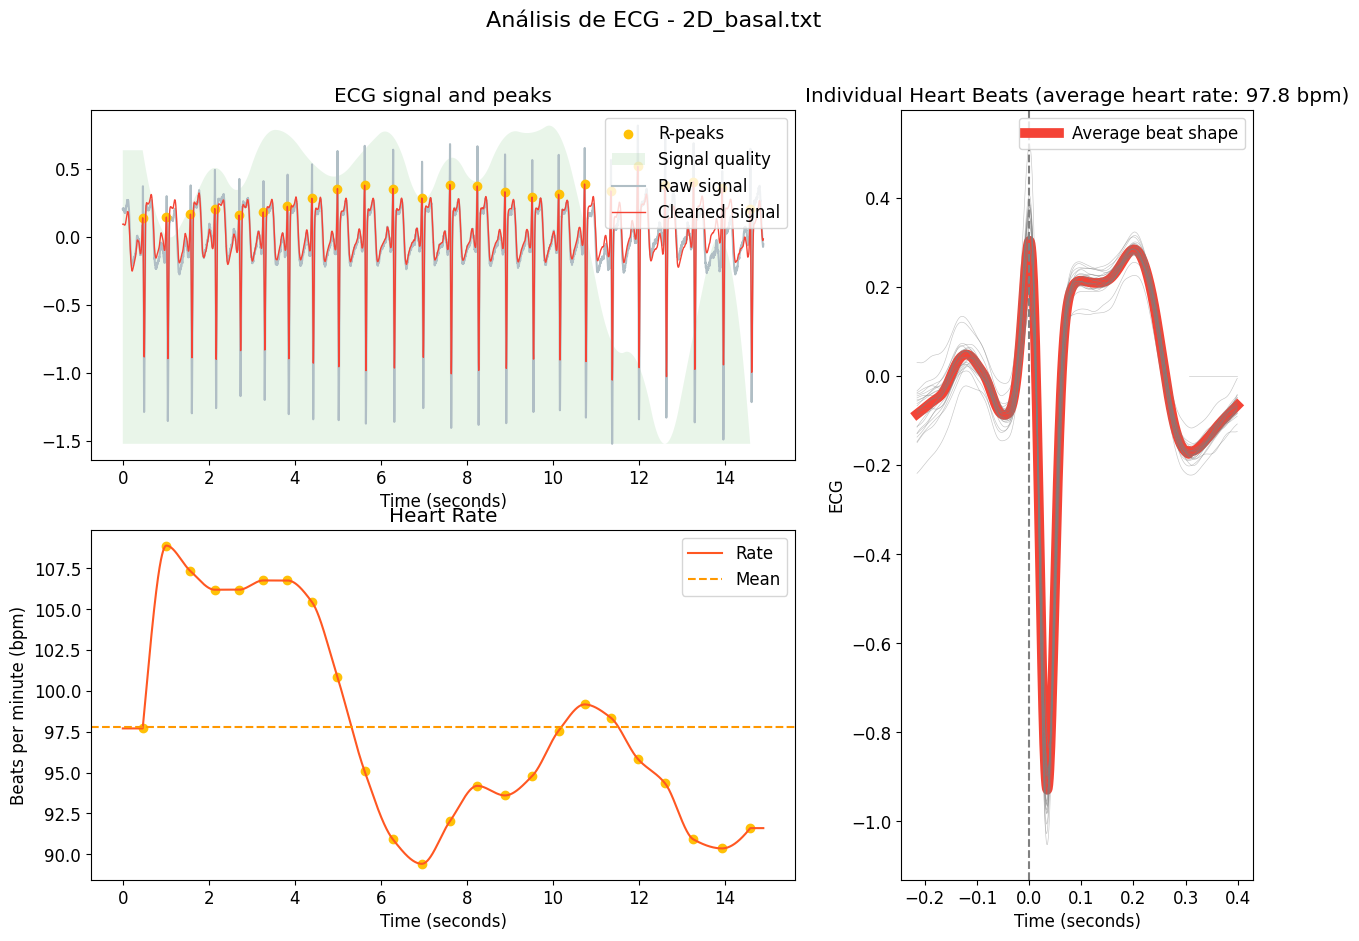

Procesando archivo: 3D_basal.txt


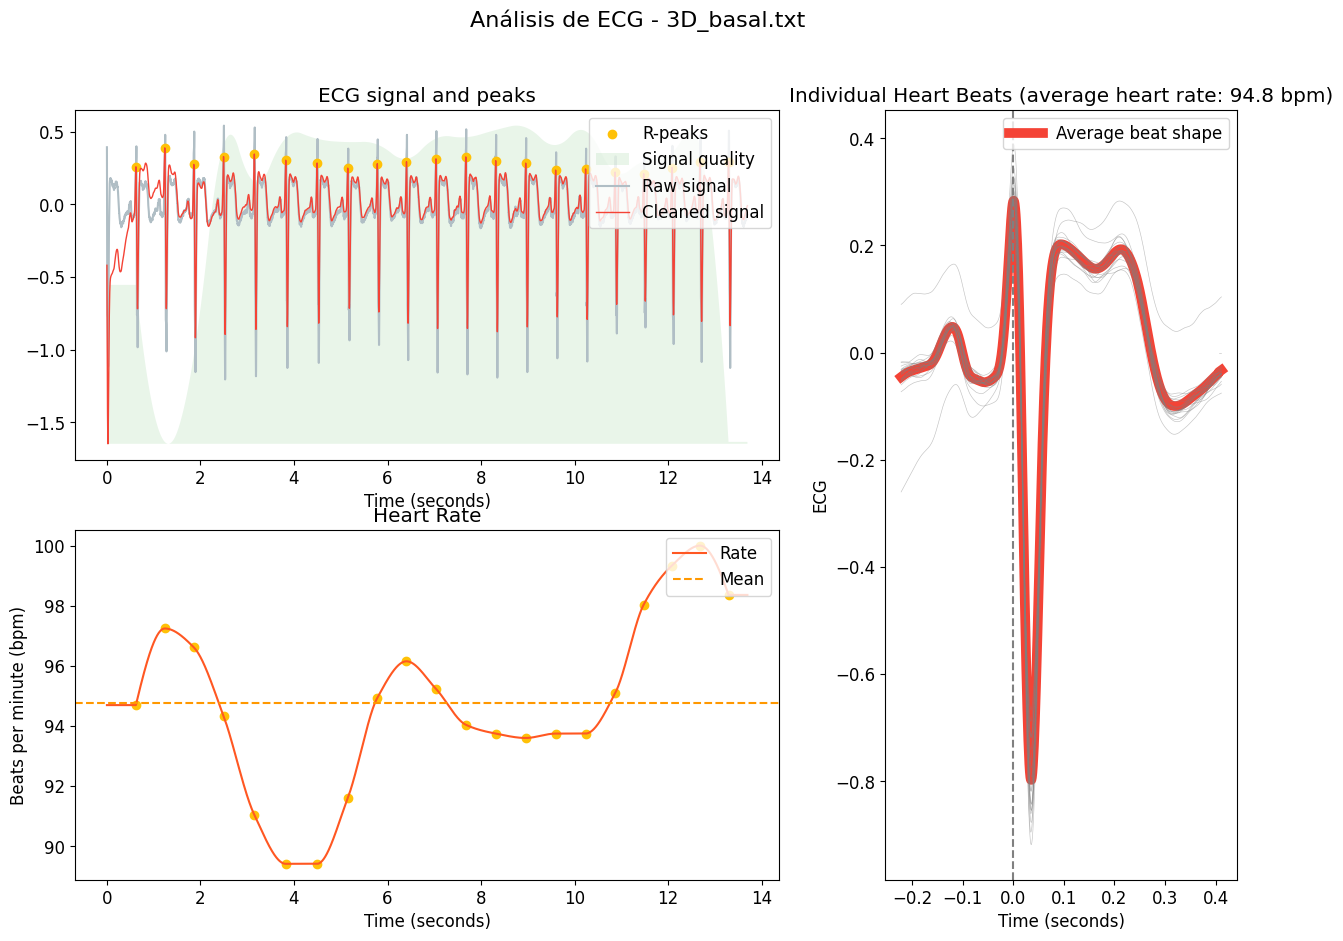

Procesando archivo: 1D_respiracion.txt


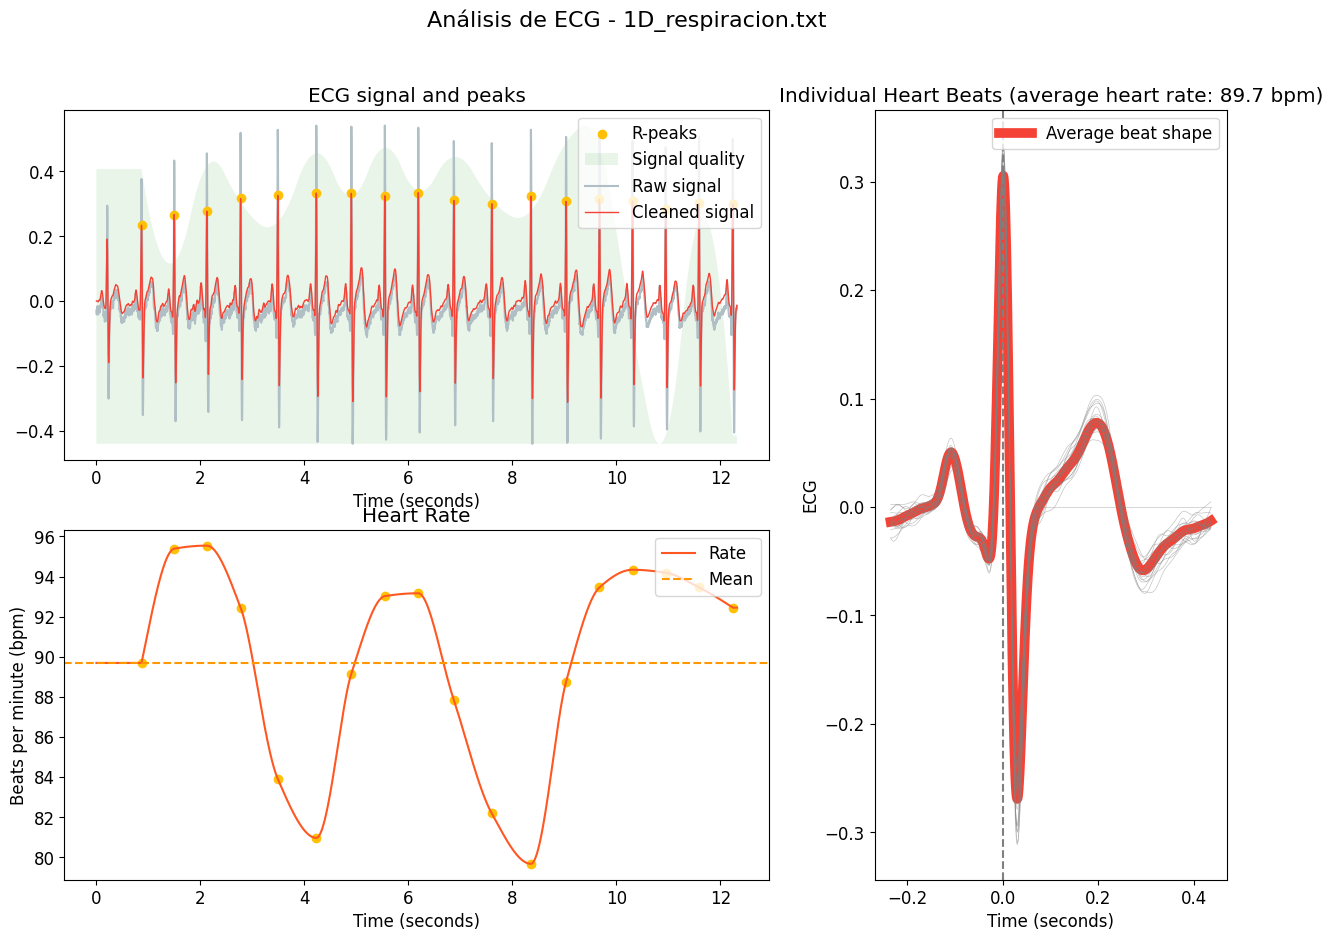

Procesando archivo: 2D_respiracion.txt


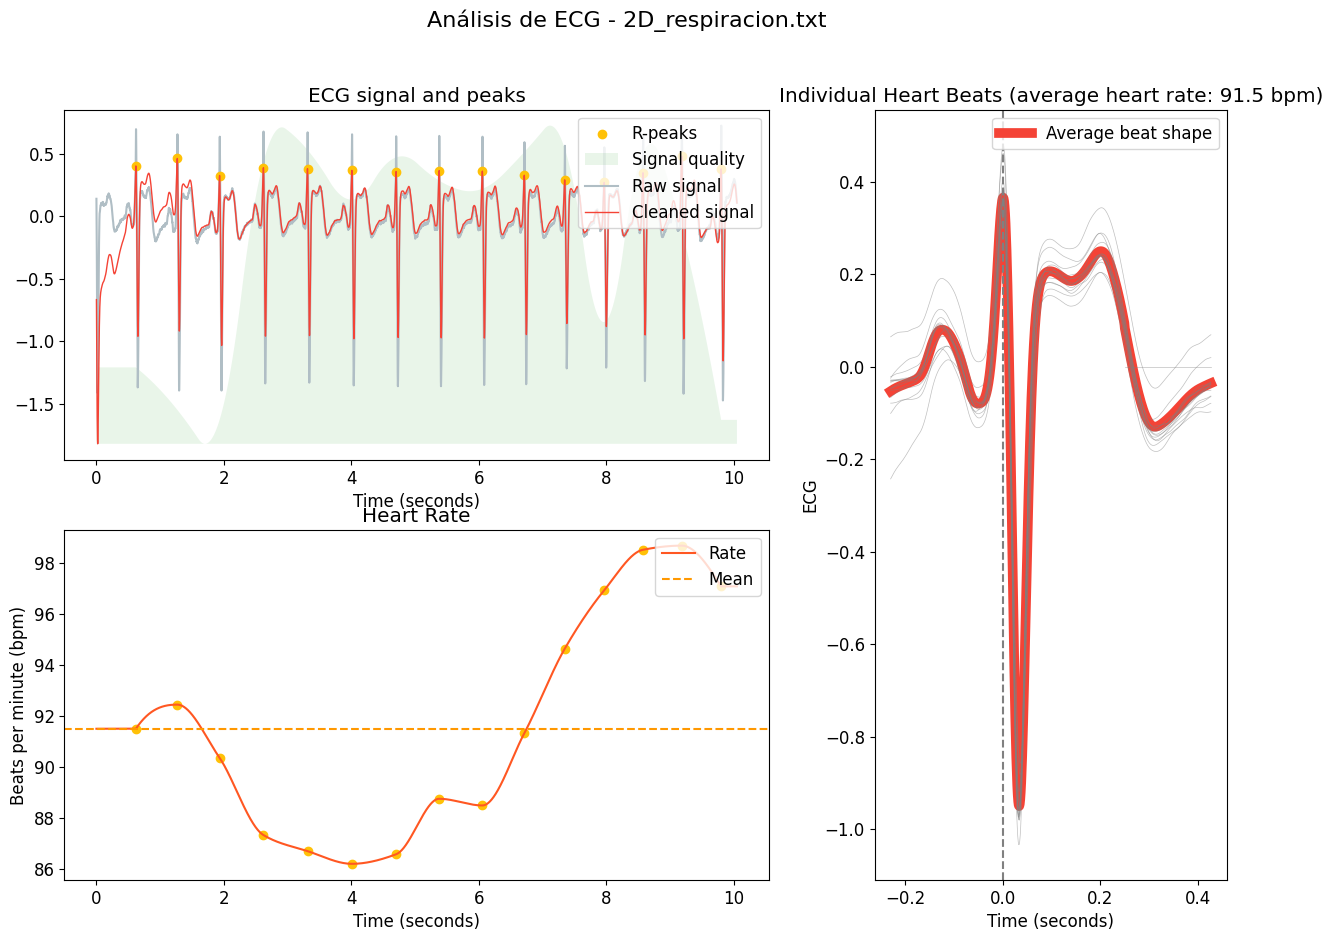

Procesando archivo: 3D_respiracion.txt


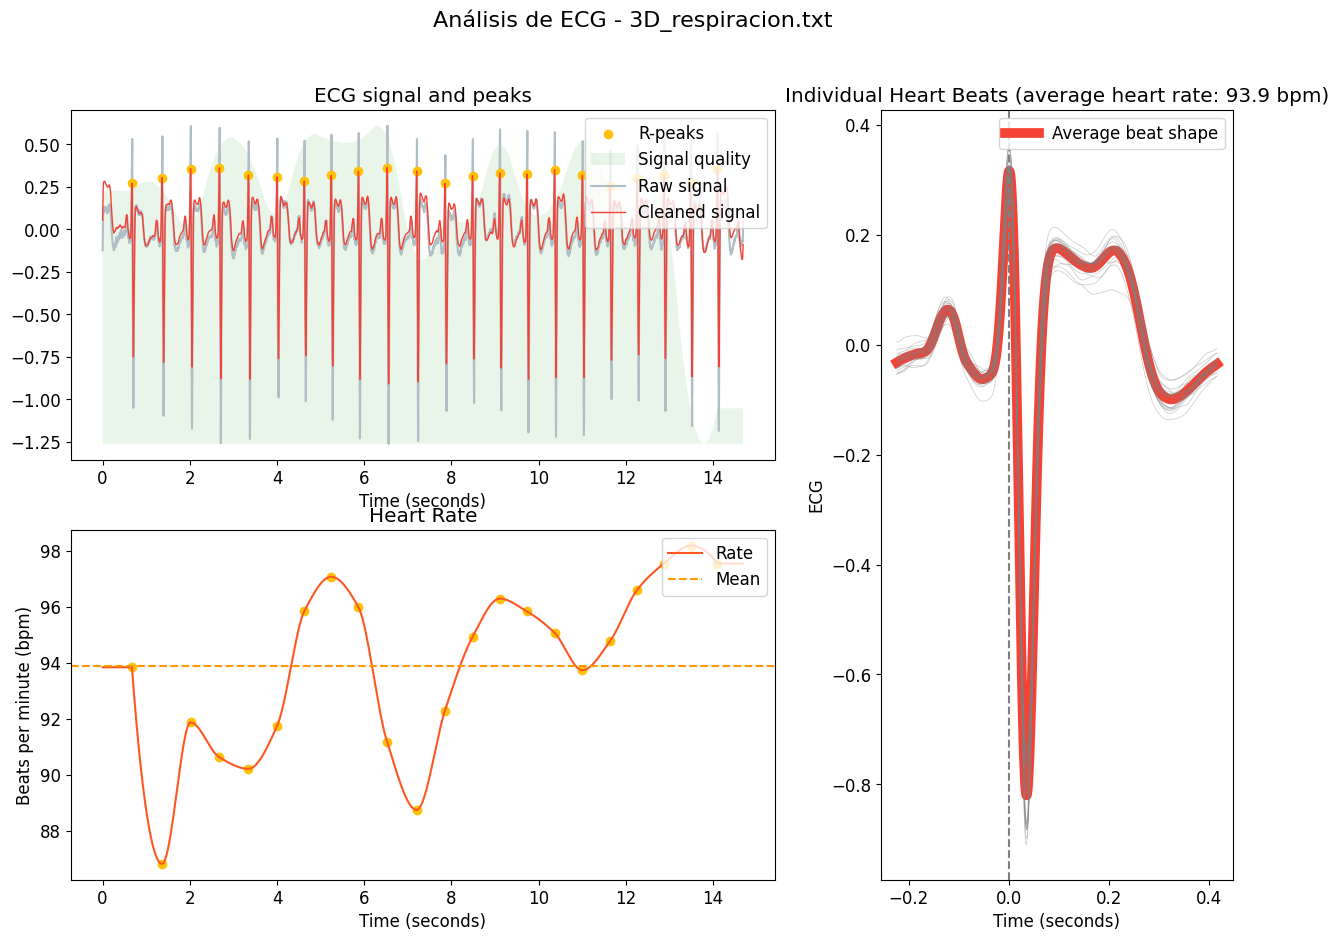

Procesando archivo: 1D_post_respiracion.txt


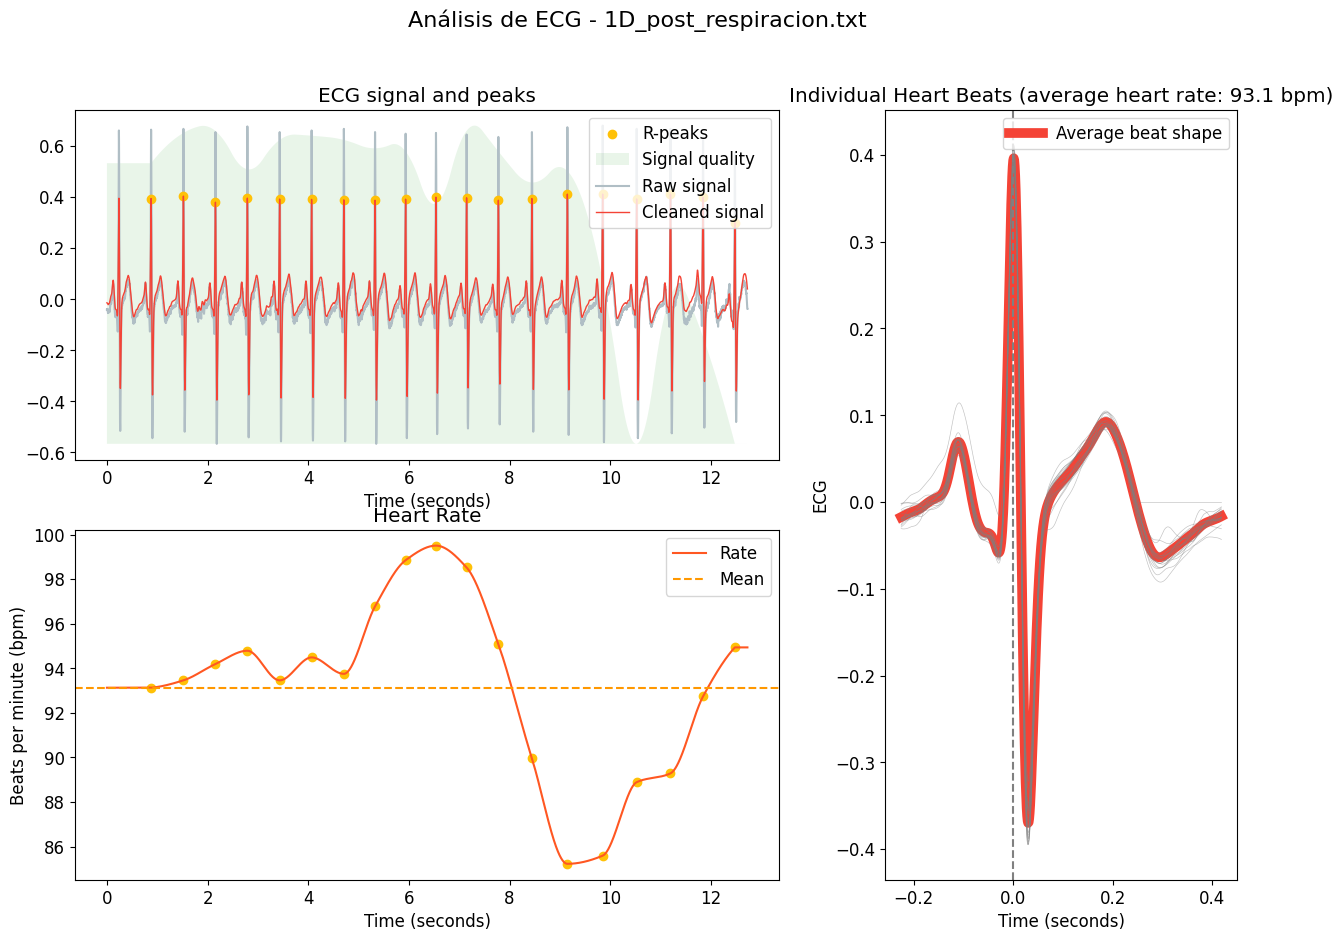

Procesando archivo: 2D_post_respiracion.txt


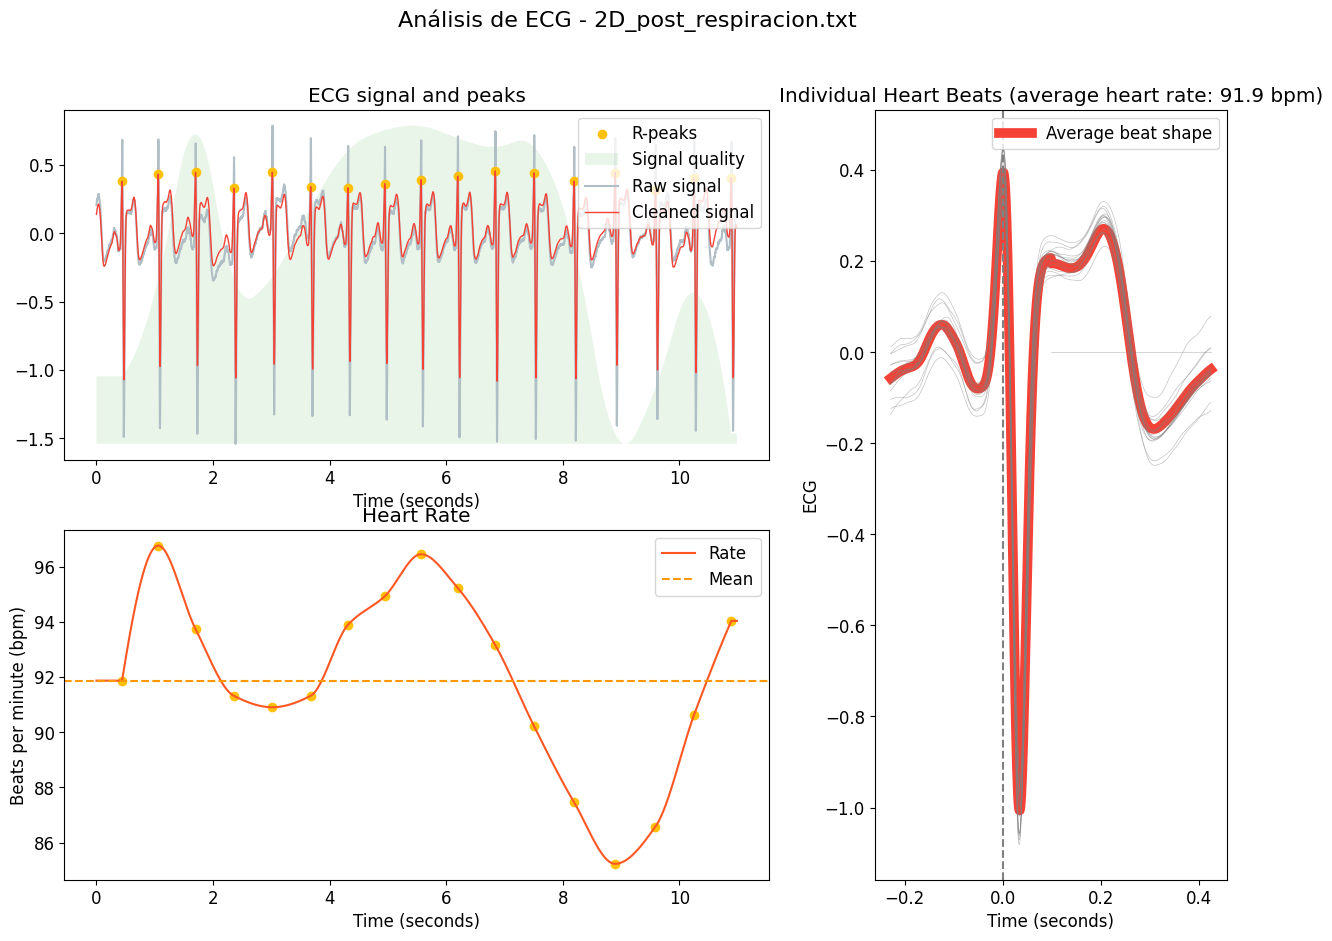

Procesando archivo: 3D_post_respiracion.txt


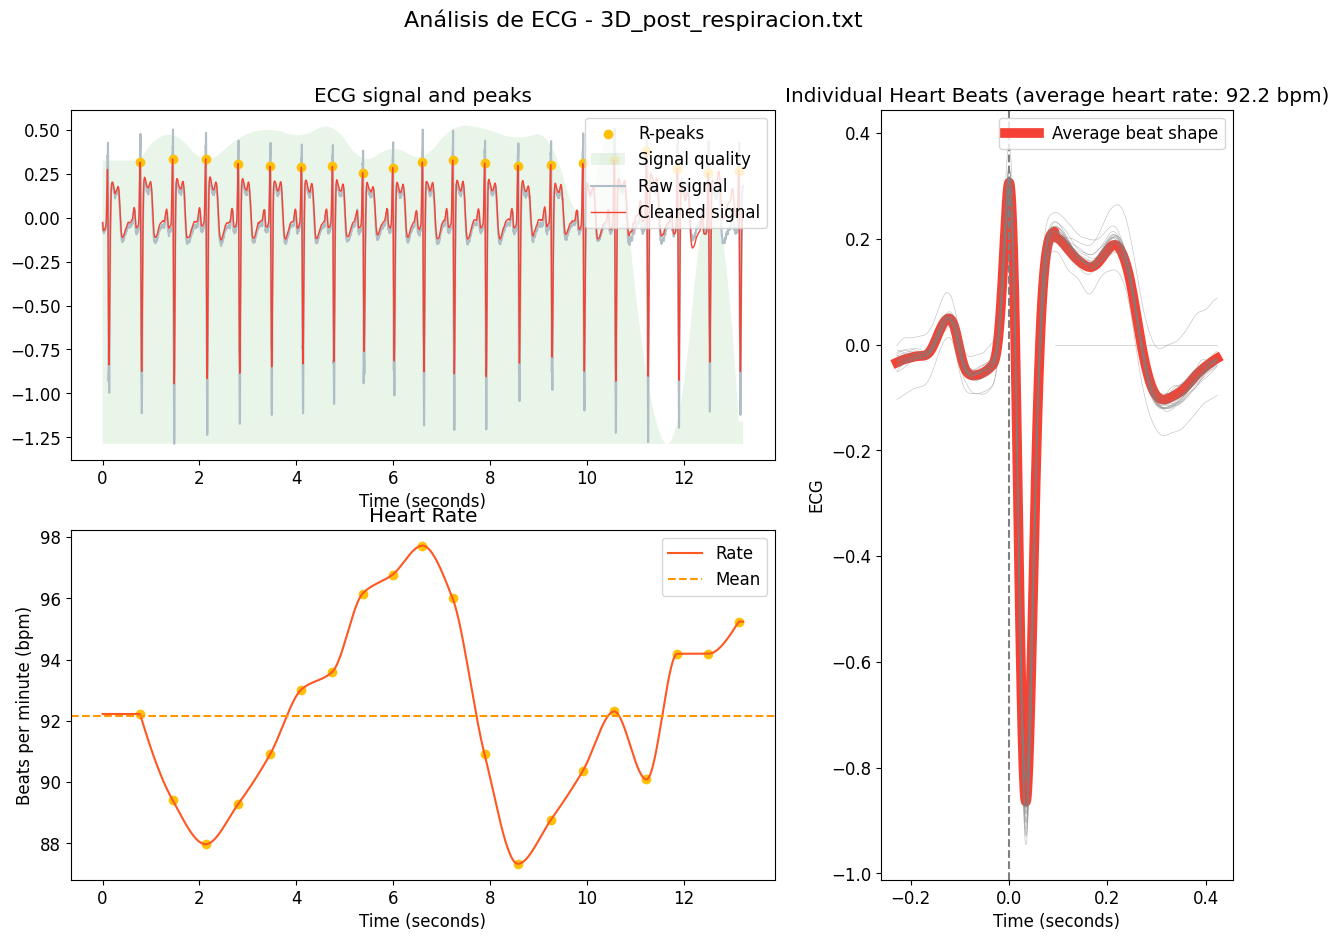

Procesando archivo: 1D_ejercicio.txt


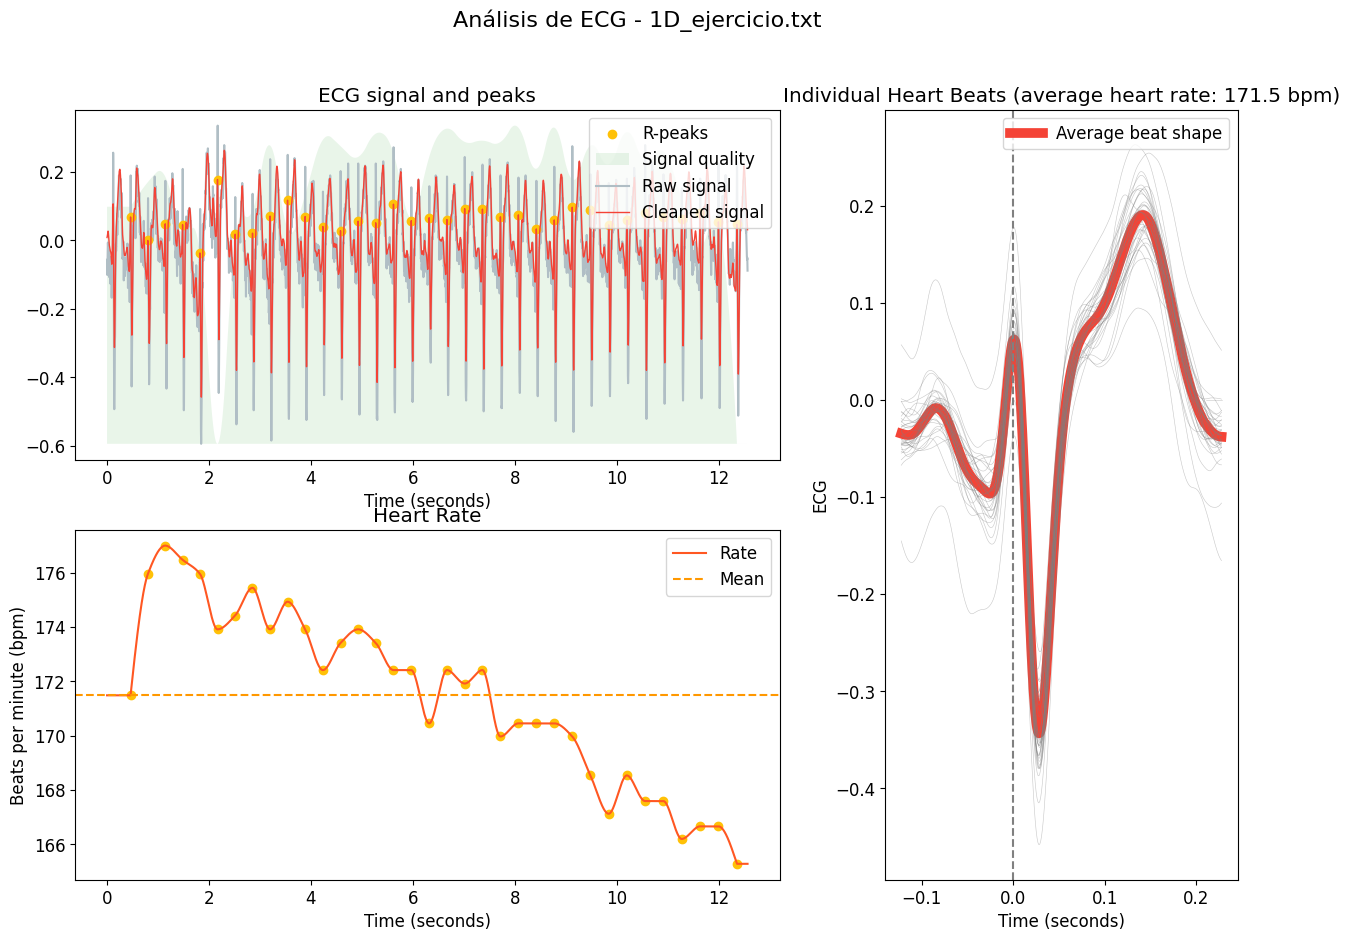

Procesando archivo: 2D_ejercicio.txt


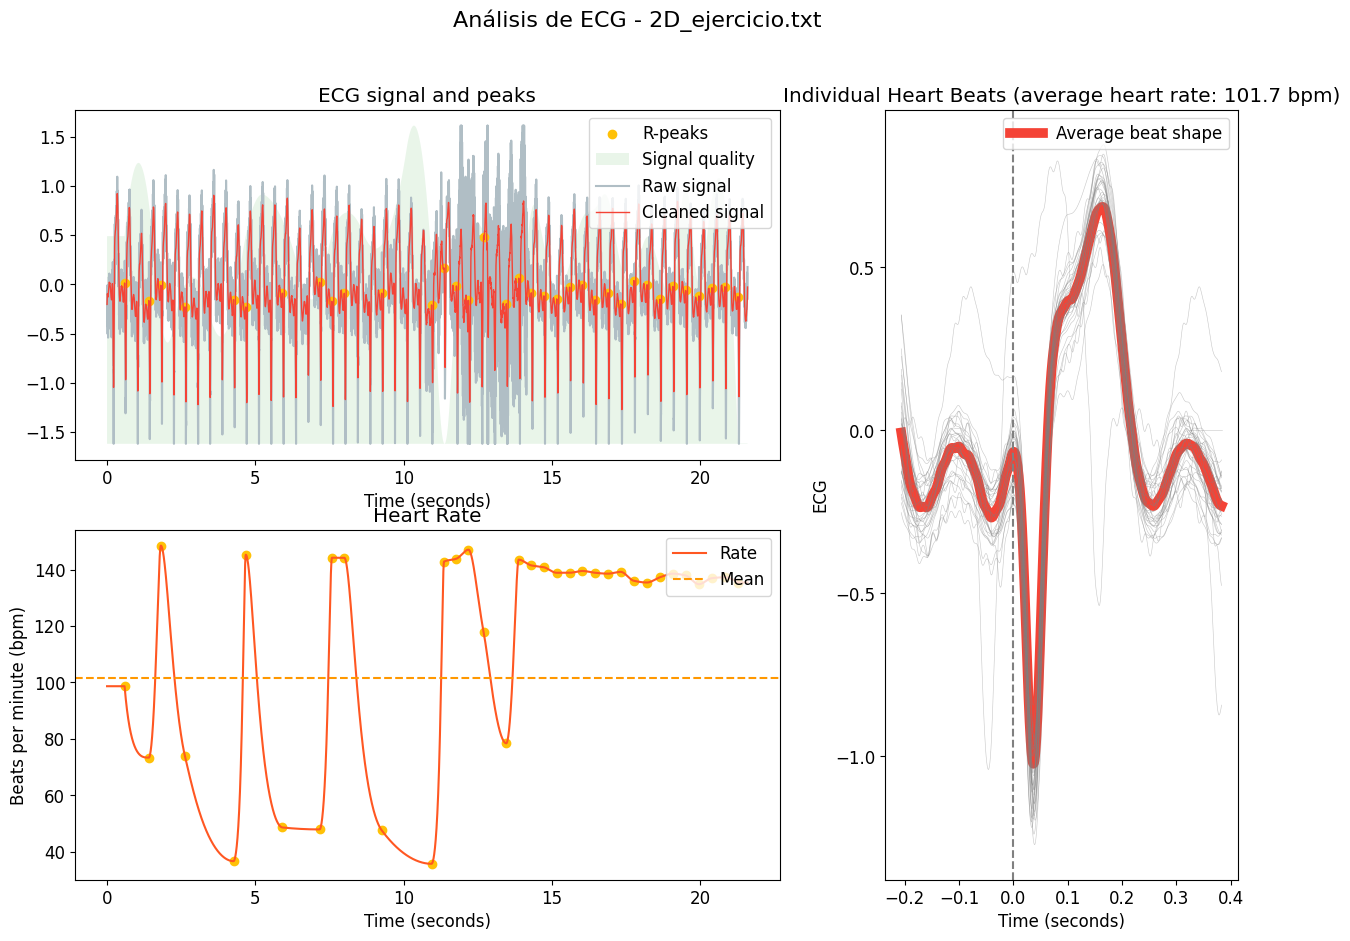

Procesando archivo: 3D_ejercicio.txt


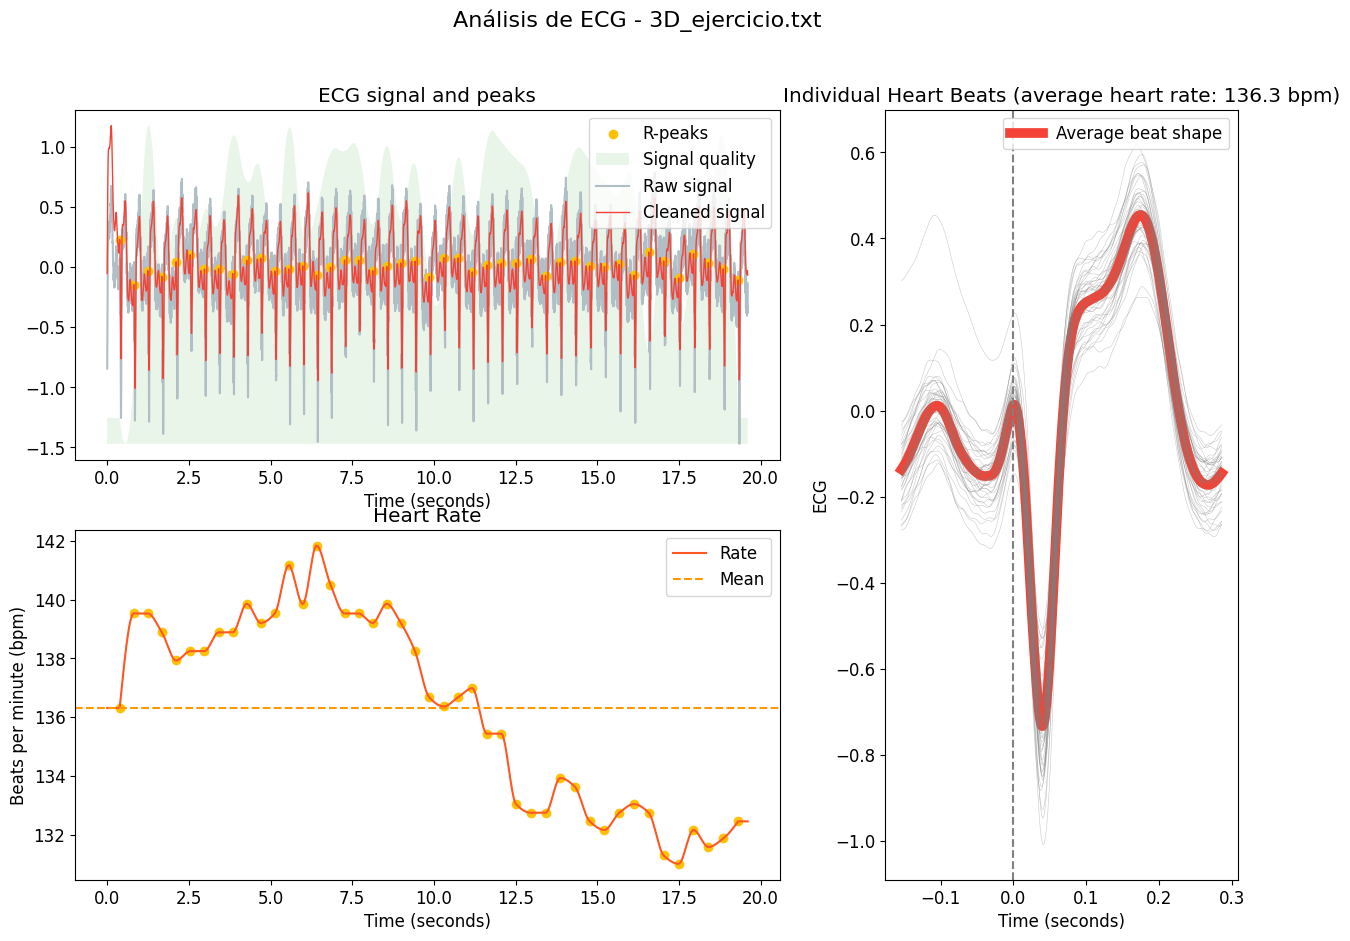

In [13]:
import numpy as np
import neurokit2 as nk
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10]  
plt.rcParams['font.size']= 12

def load_ecg_data(file_path):
    """
    Carga y convierte la señal de ECG en mV.
    """
    ecg_signal_raw = np.loadtxt(file_path, comments='#', usecols=5, skiprows=1)
    ecg_signal = ((((ecg_signal_raw / 1024) - 1 / 2) * 3.3) / 1019) * 1000  # Conversión a mV
    return ecg_signal

def process_and_analyze_ecg(ecg_signal, sampling_rate=1000):
    
    ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=sampling_rate)
    signals, info = nk.ecg_process(ecg_cleaned, sampling_rate=sampling_rate)
    nk.ecg_plot(signals, info)
    
def my_processing(ecg_signal):
   
    ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=1000)
    instant_peaks, rpeaks, = nk.ecg_peaks(ecg_cleaned, sampling_rate=1000)
    rate = nk.ecg_rate(rpeaks, sampling_rate=1000, desired_length=len(ecg_cleaned))
    quality = nk.ecg_quality(ecg_cleaned, sampling_rate=1000)


    
    signals = pd.DataFrame({"ECG_Raw": ecg_signal,
                            "ECG_Clean": ecg_cleaned,
                            "ECG_Rate": rate,
                            "ECG_Quality": quality})
    signals = pd.concat([signals, instant_peaks], axis=1)

    
    info = rpeaks
    info["sampling_rate"] = 1000
    
    return signals, info

def main():
    file_paths = [
        "C:/Users/Lenovo/OneDrive/Escritorio/Repositorio ISB/Github/Laboratorios/Laboratorio 10/Data/1.Estado Basal/1D_basal.txt",
        "C:/Users/Lenovo/OneDrive/Escritorio/Repositorio ISB/Github/Laboratorios/Laboratorio 10/Data/1.Estado Basal/2D_basal.txt",
        "C:/Users/Lenovo/OneDrive/Escritorio/Repositorio ISB/Github/Laboratorios/Laboratorio 10/Data/1.Estado Basal/3D_basal.txt",
        "C:/Users/Lenovo/OneDrive/Escritorio/Repositorio ISB/Github/Laboratorios/Laboratorio 10/Data/2.Respiración/1D_respiracion.txt",
        "C:/Users/Lenovo/OneDrive/Escritorio/Repositorio ISB/Github/Laboratorios/Laboratorio 10/Data/2.Respiración/2D_respiracion.txt",
        "C:/Users/Lenovo/OneDrive/Escritorio/Repositorio ISB/Github/Laboratorios/Laboratorio 10/Data/2.Respiración/3D_respiracion.txt",
        "C:/Users/Lenovo/OneDrive/Escritorio/Repositorio ISB/Github/Laboratorios/Laboratorio 10/Data/3.Post_Respiración/1D_post_respiracion.txt",
        "C:/Users/Lenovo/OneDrive/Escritorio/Repositorio ISB/Github/Laboratorios/Laboratorio 10/Data/3.Post_Respiración/2D_post_respiracion.txt",
        "C:/Users/Lenovo/OneDrive/Escritorio/Repositorio ISB/Github/Laboratorios/Laboratorio 10/Data/3.Post_Respiración/3D_post_respiracion.txt",
        "C:/Users/Lenovo/OneDrive/Escritorio/Repositorio ISB/Github/Laboratorios/Laboratorio 10/Data/4.Ejercicio/1D_ejercicio.txt",
        "C:/Users/Lenovo/OneDrive/Escritorio/Repositorio ISB/Github/Laboratorios/Laboratorio 10/Data/4.Ejercicio/2D_ejercicio.txt",
        "C:/Users/Lenovo/OneDrive/Escritorio/Repositorio ISB/Github/Laboratorios/Laboratorio 10/Data/4.Ejercicio/3D_ejercicio.txt"
    ]

    sampling_rate = 1000  # Frecuencia de muestreo en Hz

    for file_path in file_paths:
        try:
            file_name = os.path.basename(file_path)

            
            ecg_signal = load_ecg_data(file_path)
            print(f"Procesando archivo: {file_name}")
            signalhq,infohq=my_processing(ecg_signal)
            fig = nk.ecg_plot(signalhq, infohq)
            plt.suptitle(f"Análisis de ECG - {file_name}", fontsize=16)
            plt.show()

        except Exception as e:
            print(f"Error procesando el archivo {file_path}: {e}")

main()




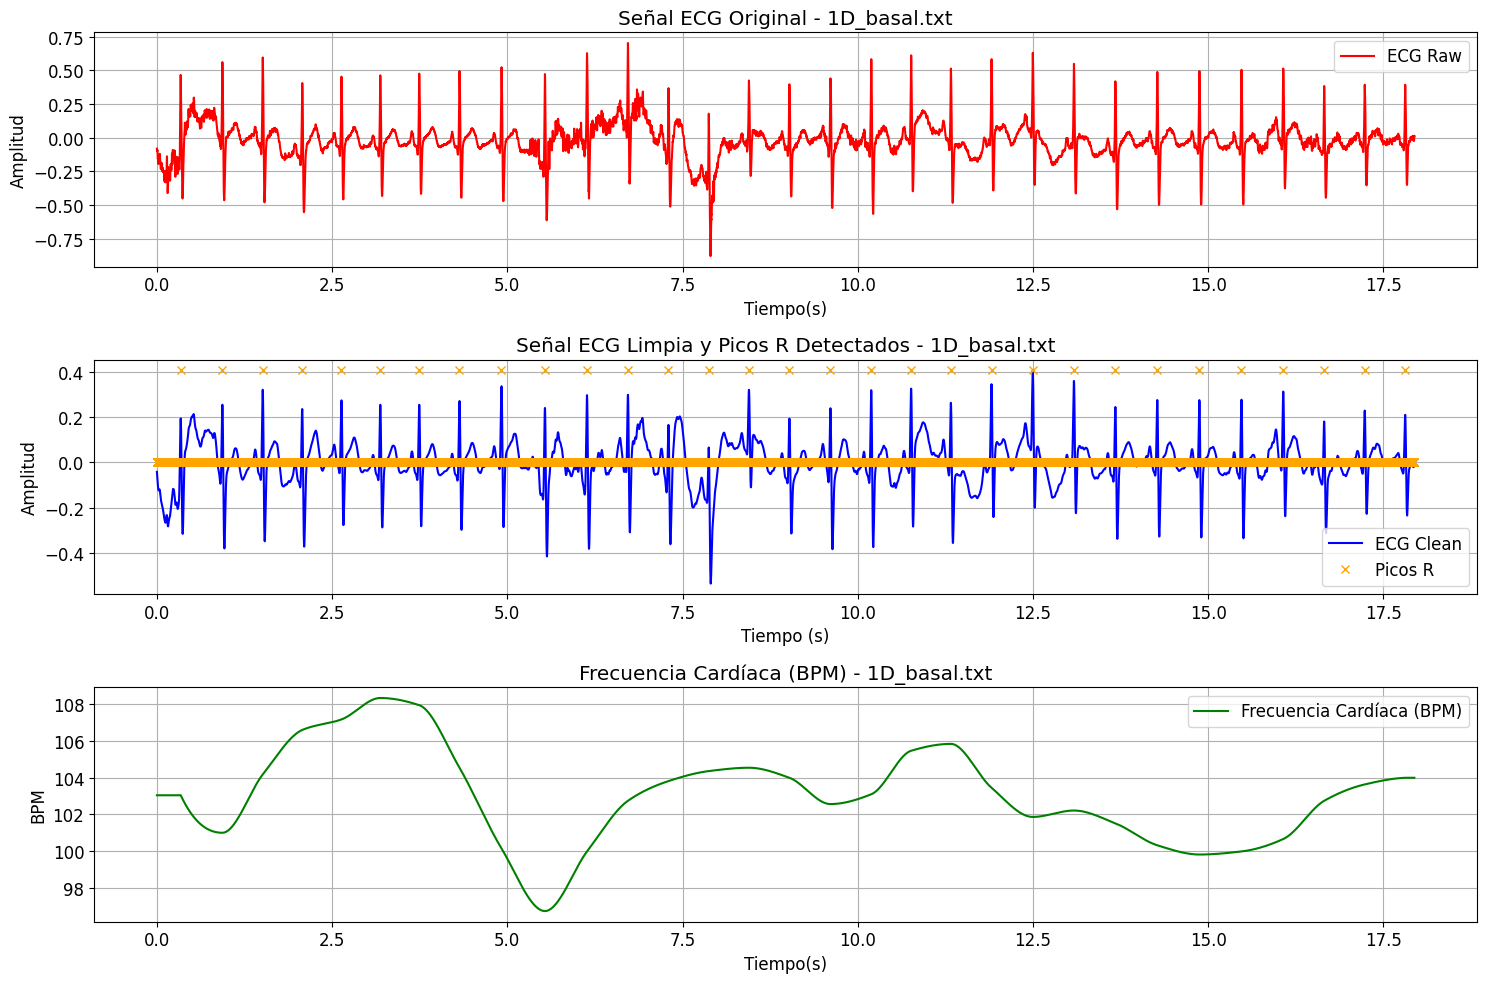

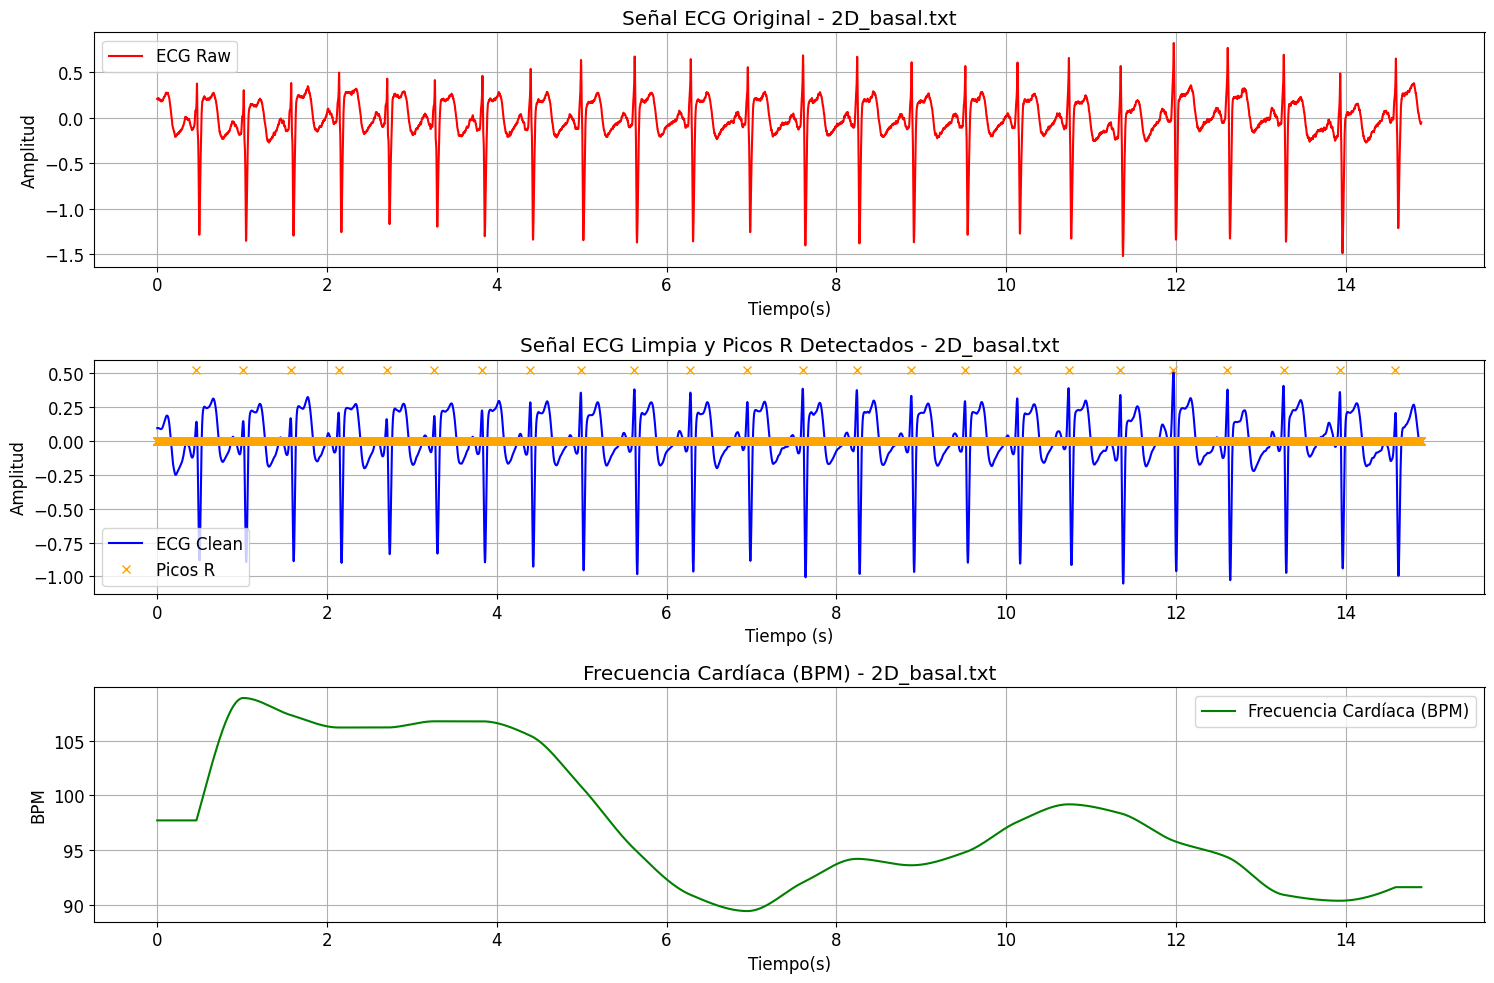

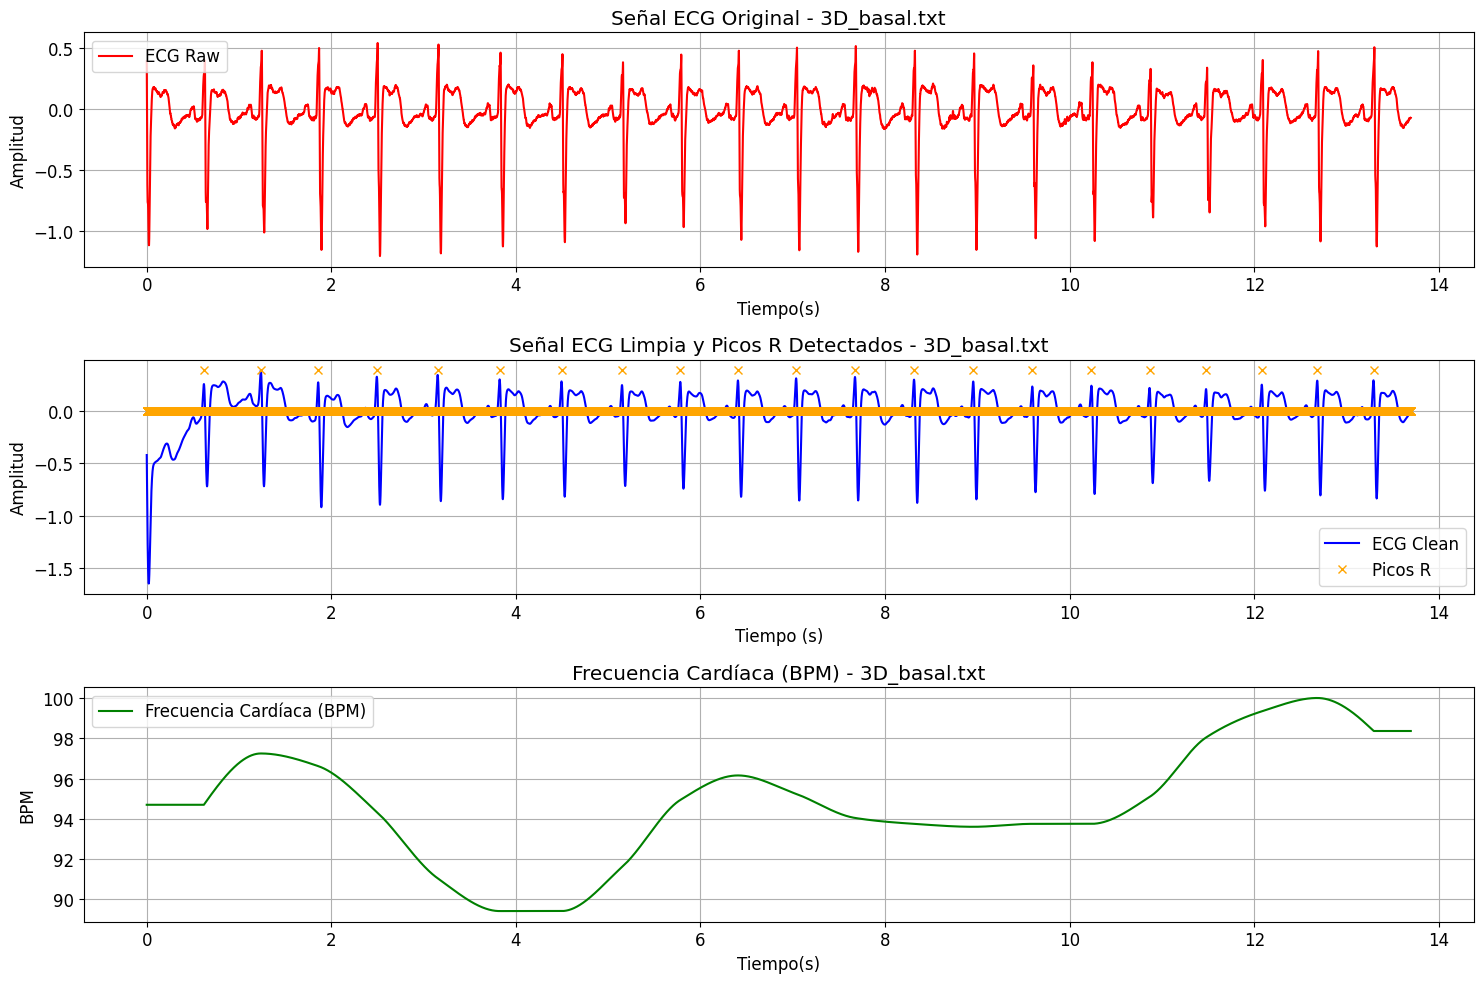

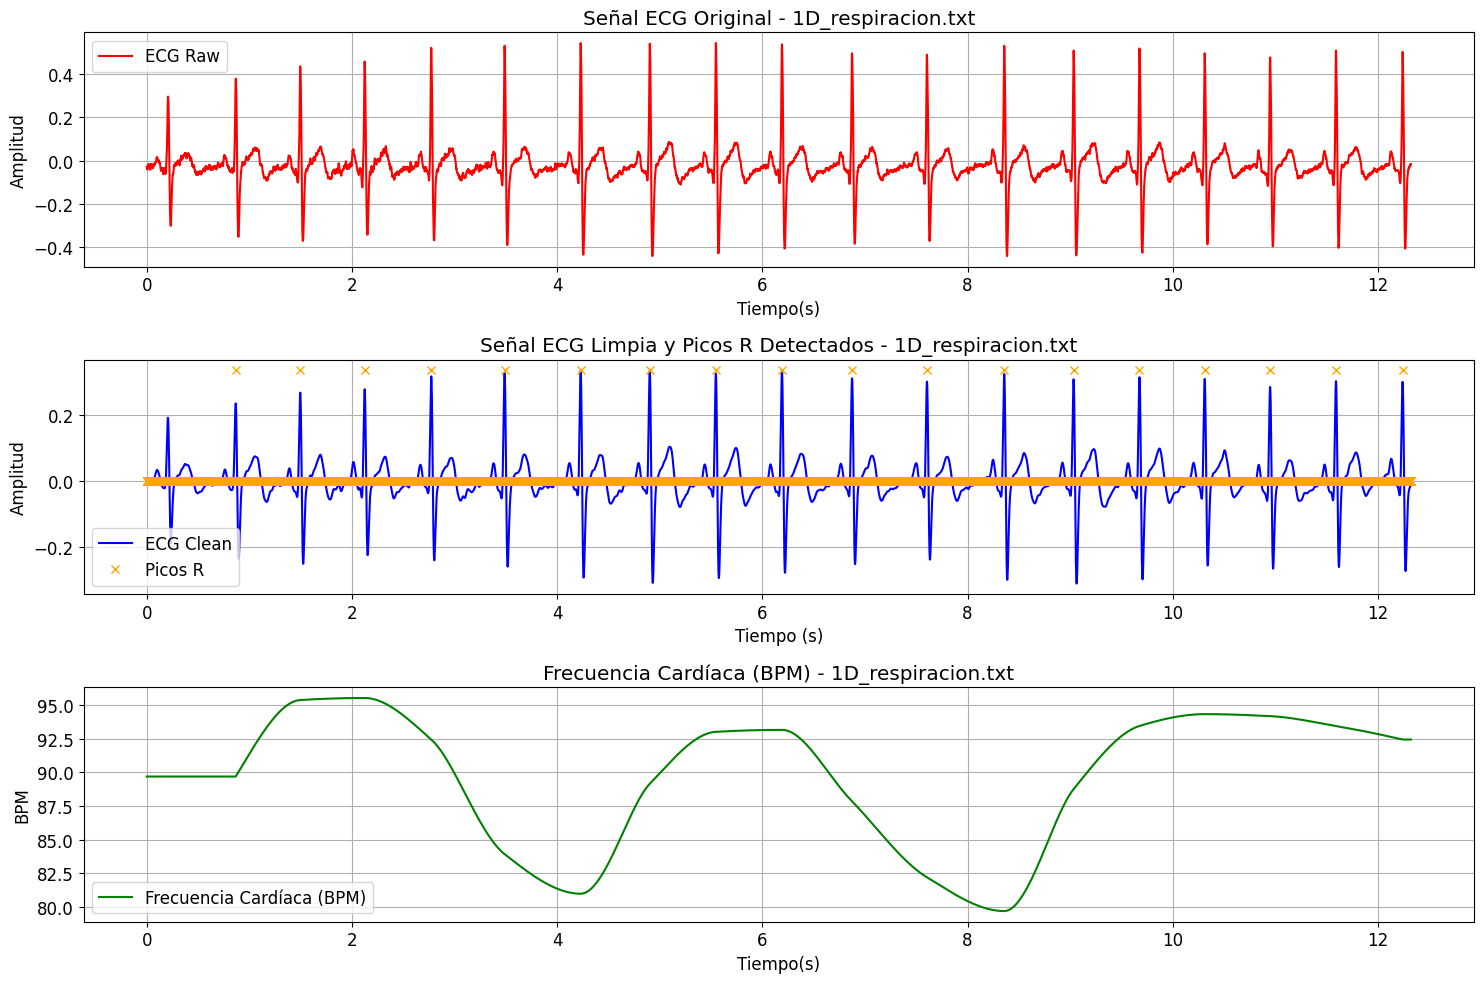

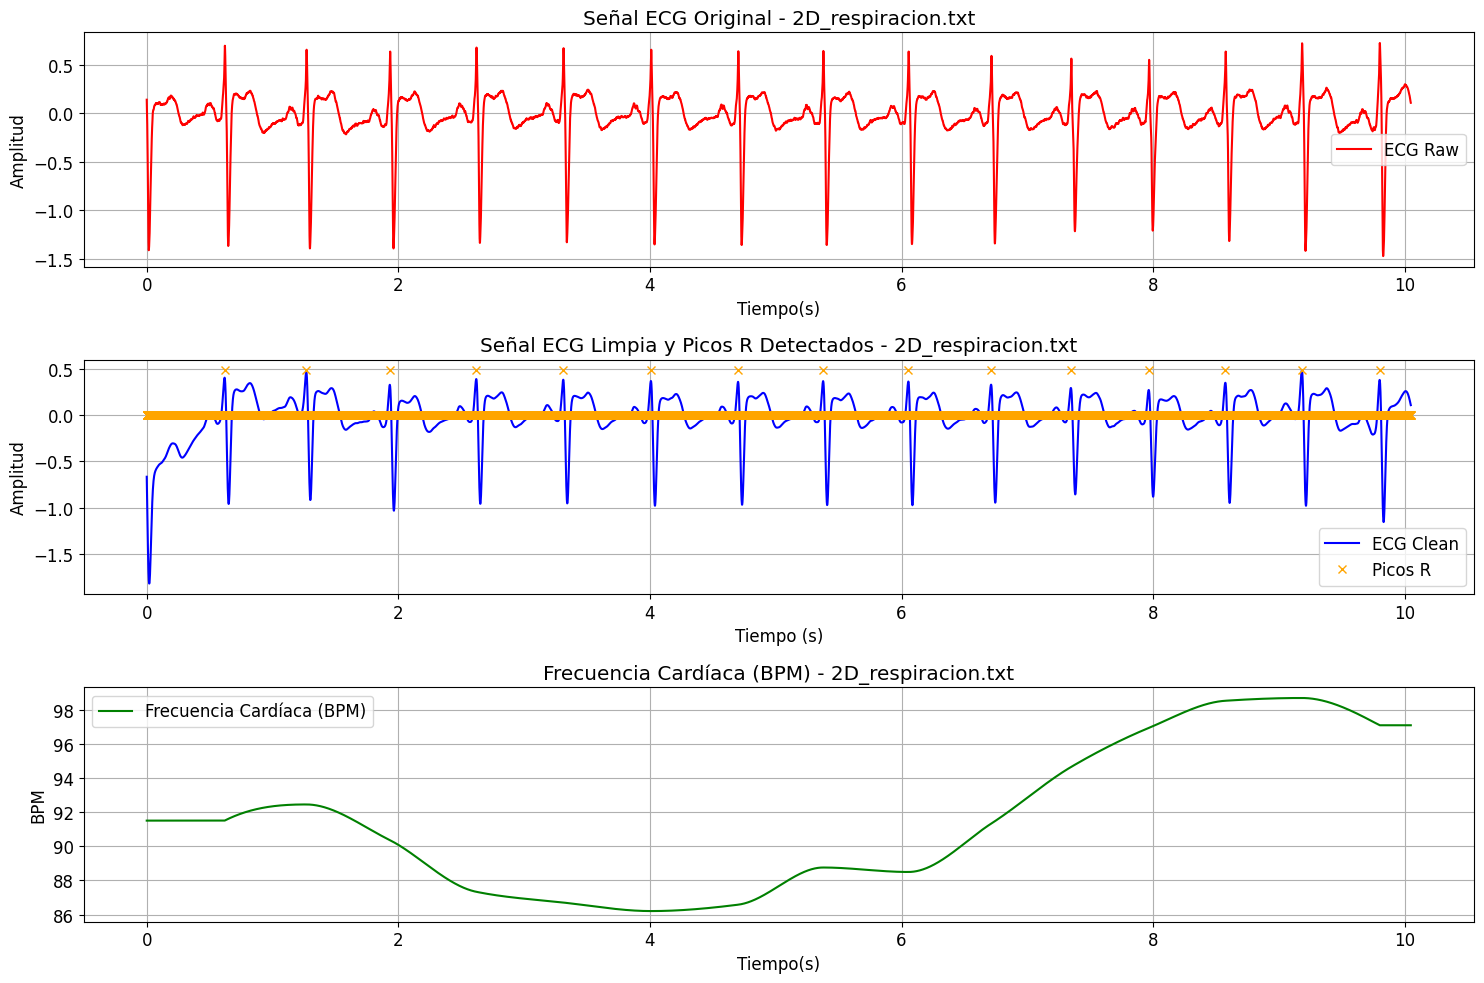

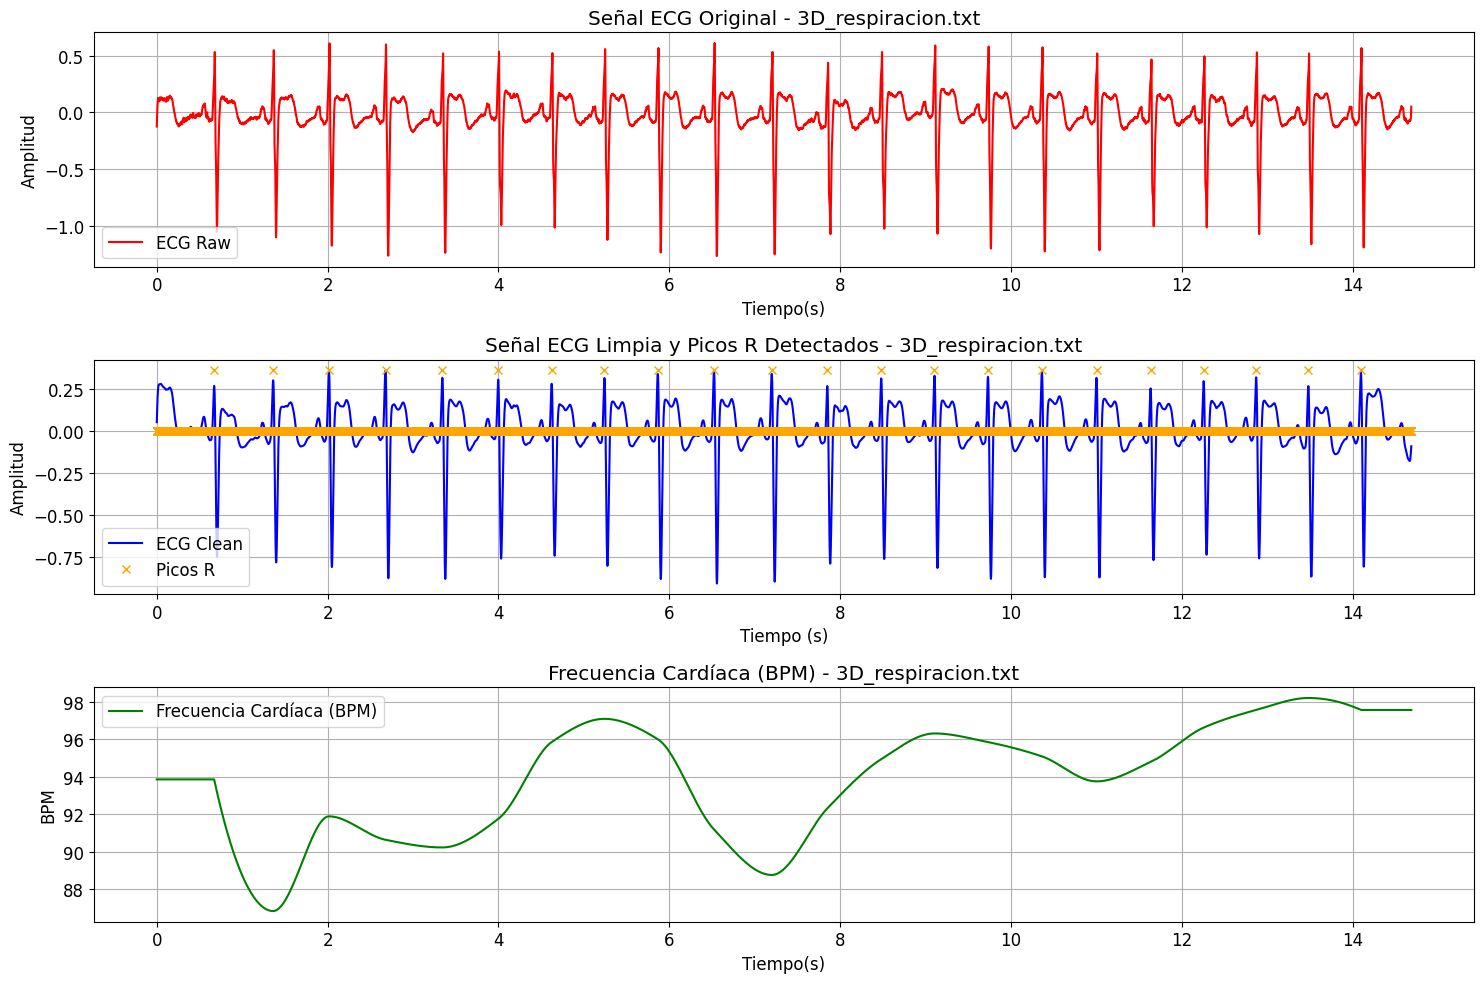

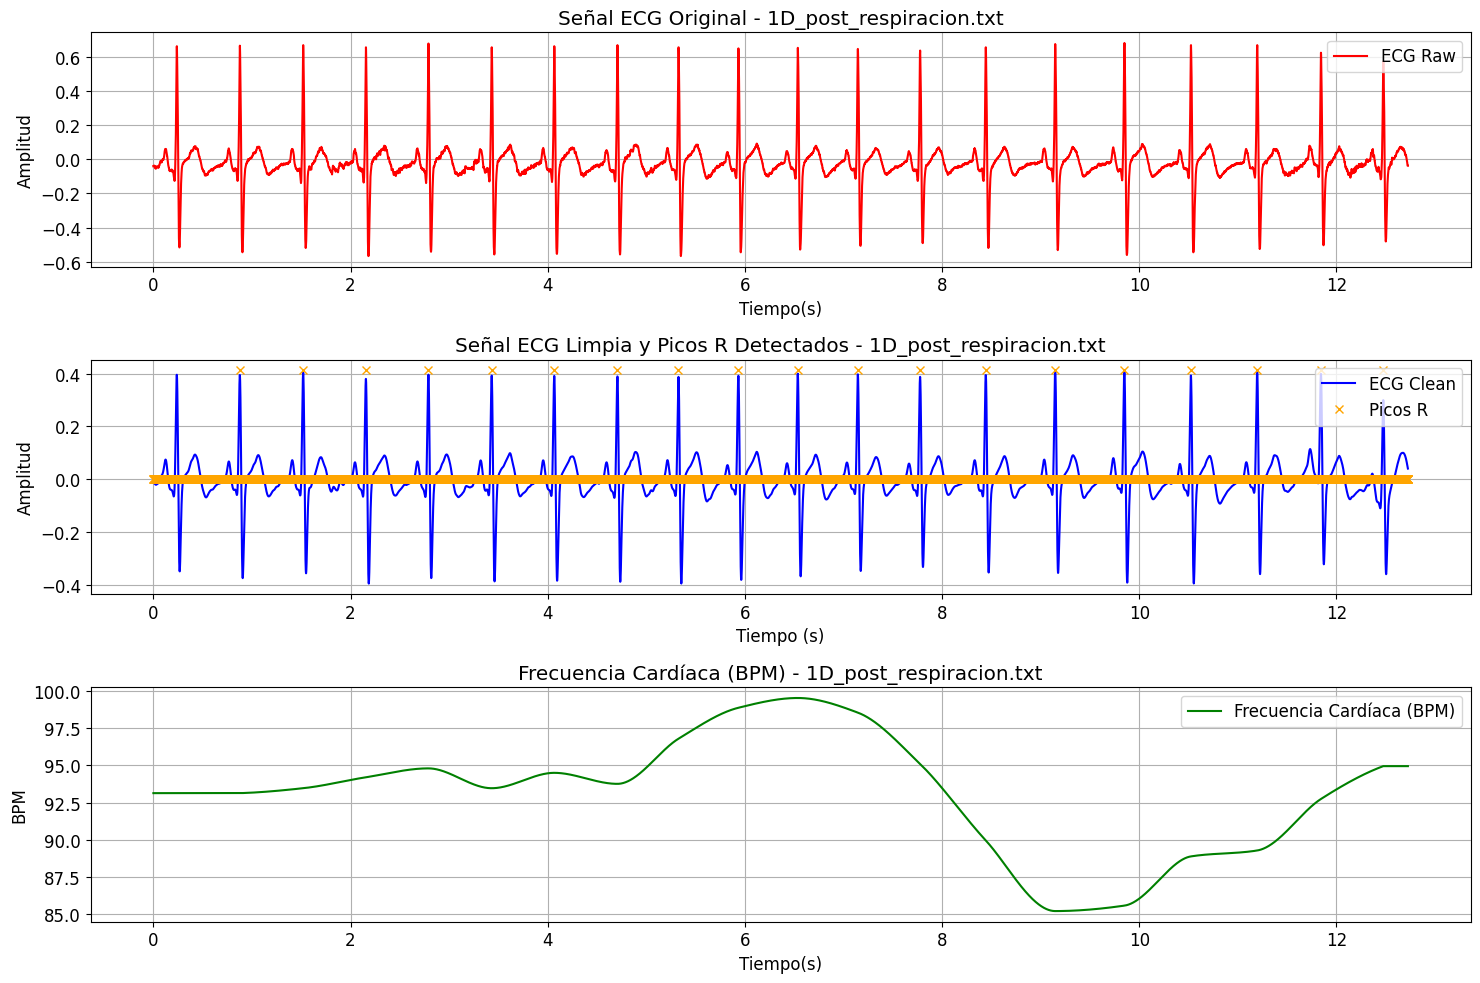

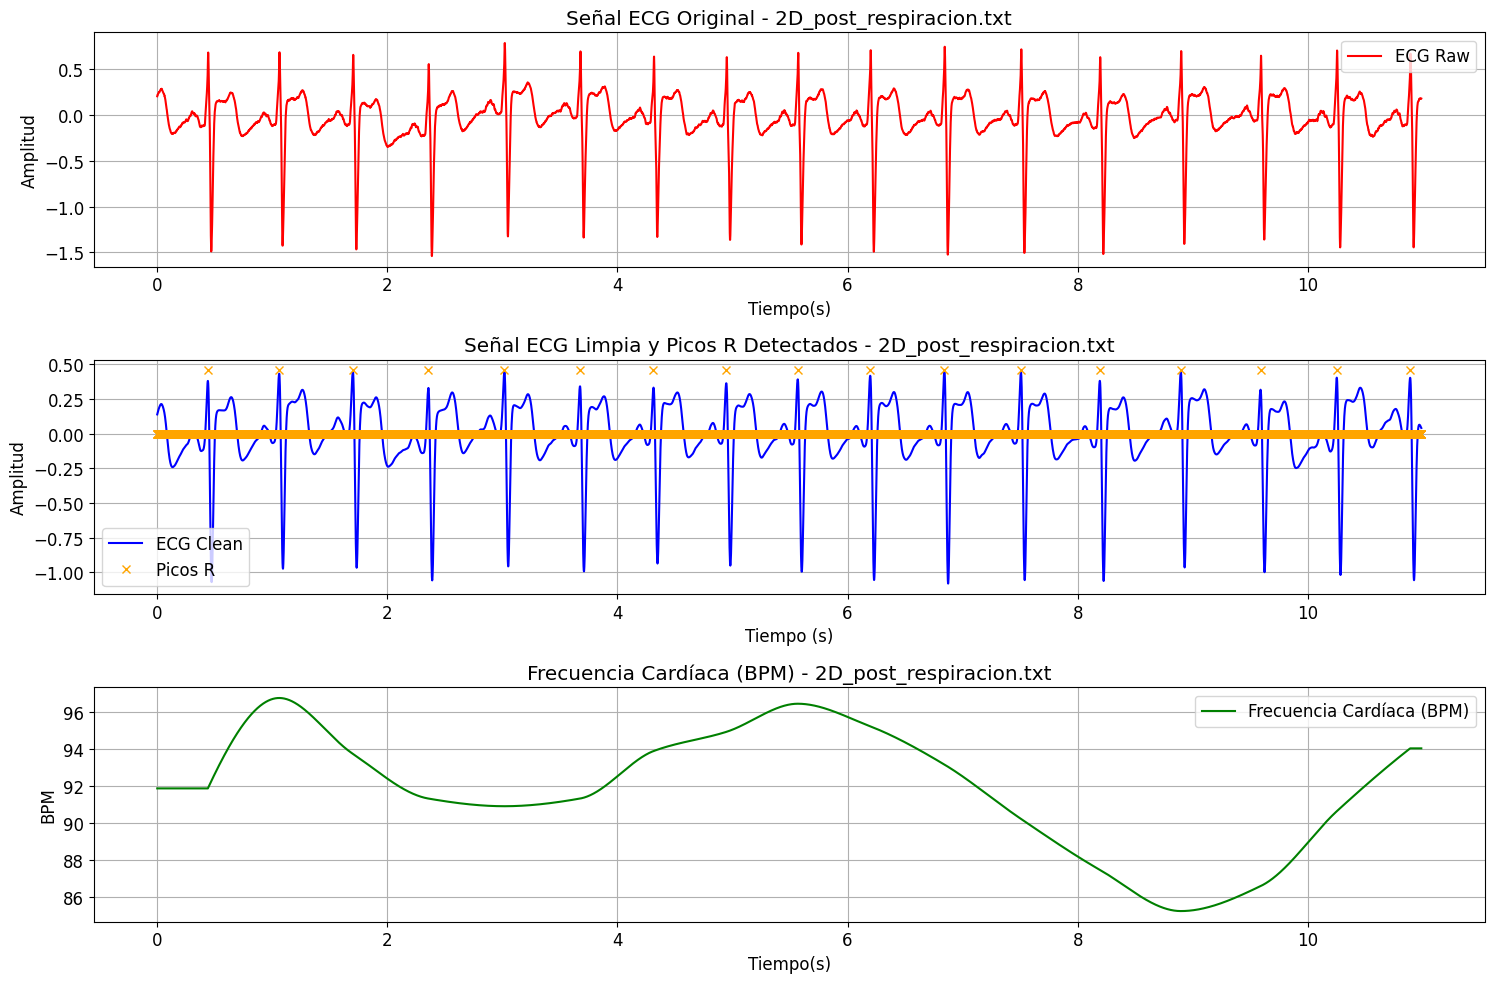

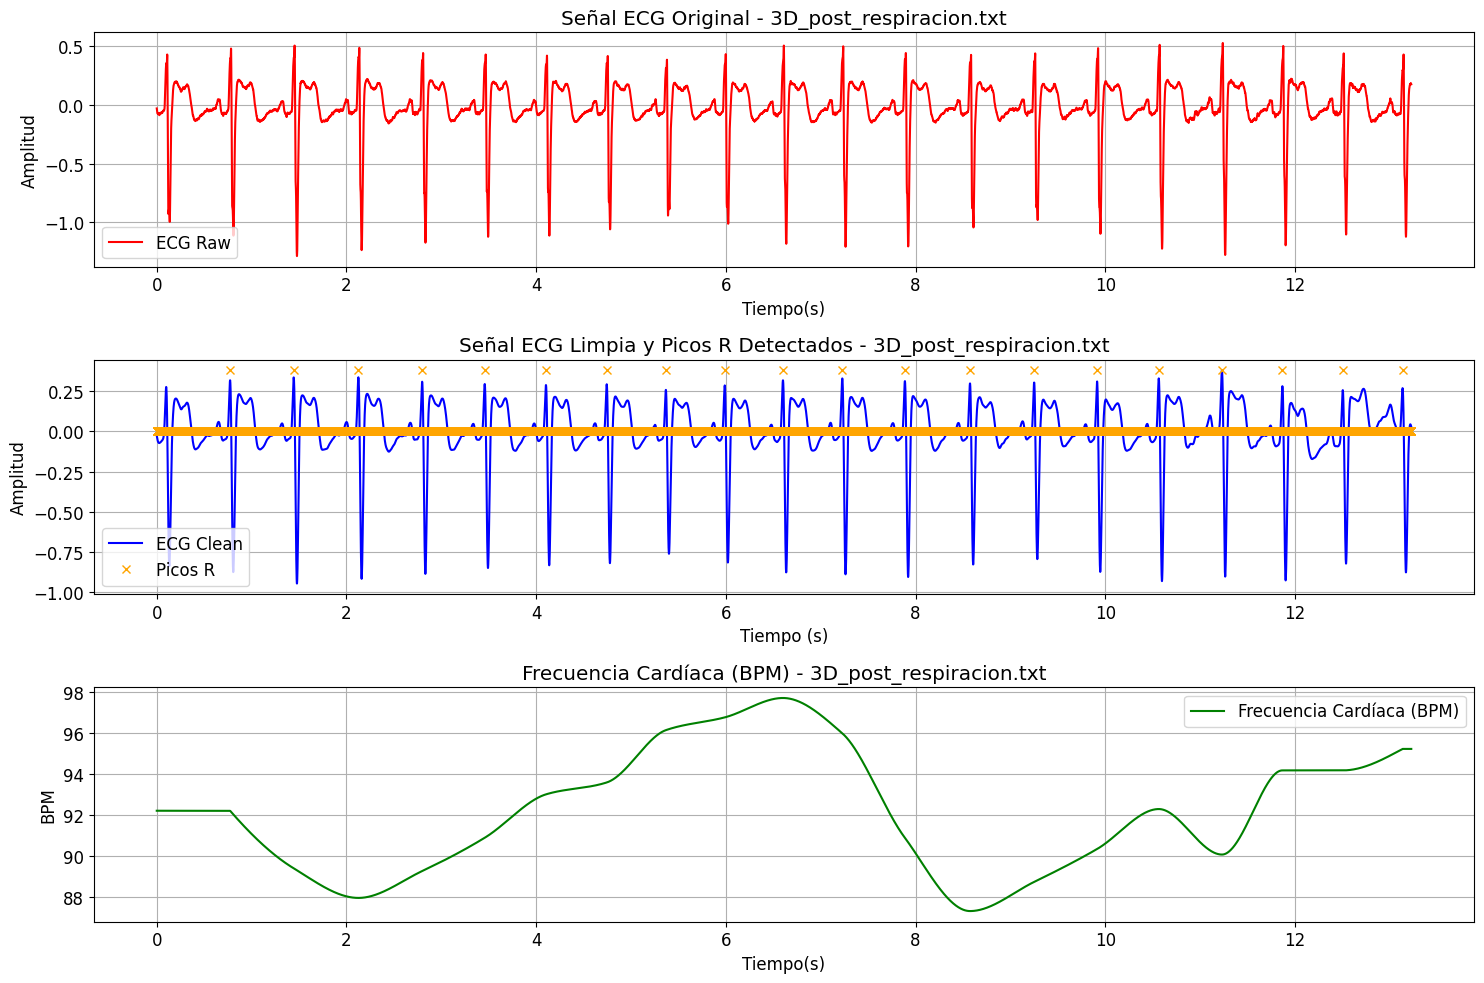

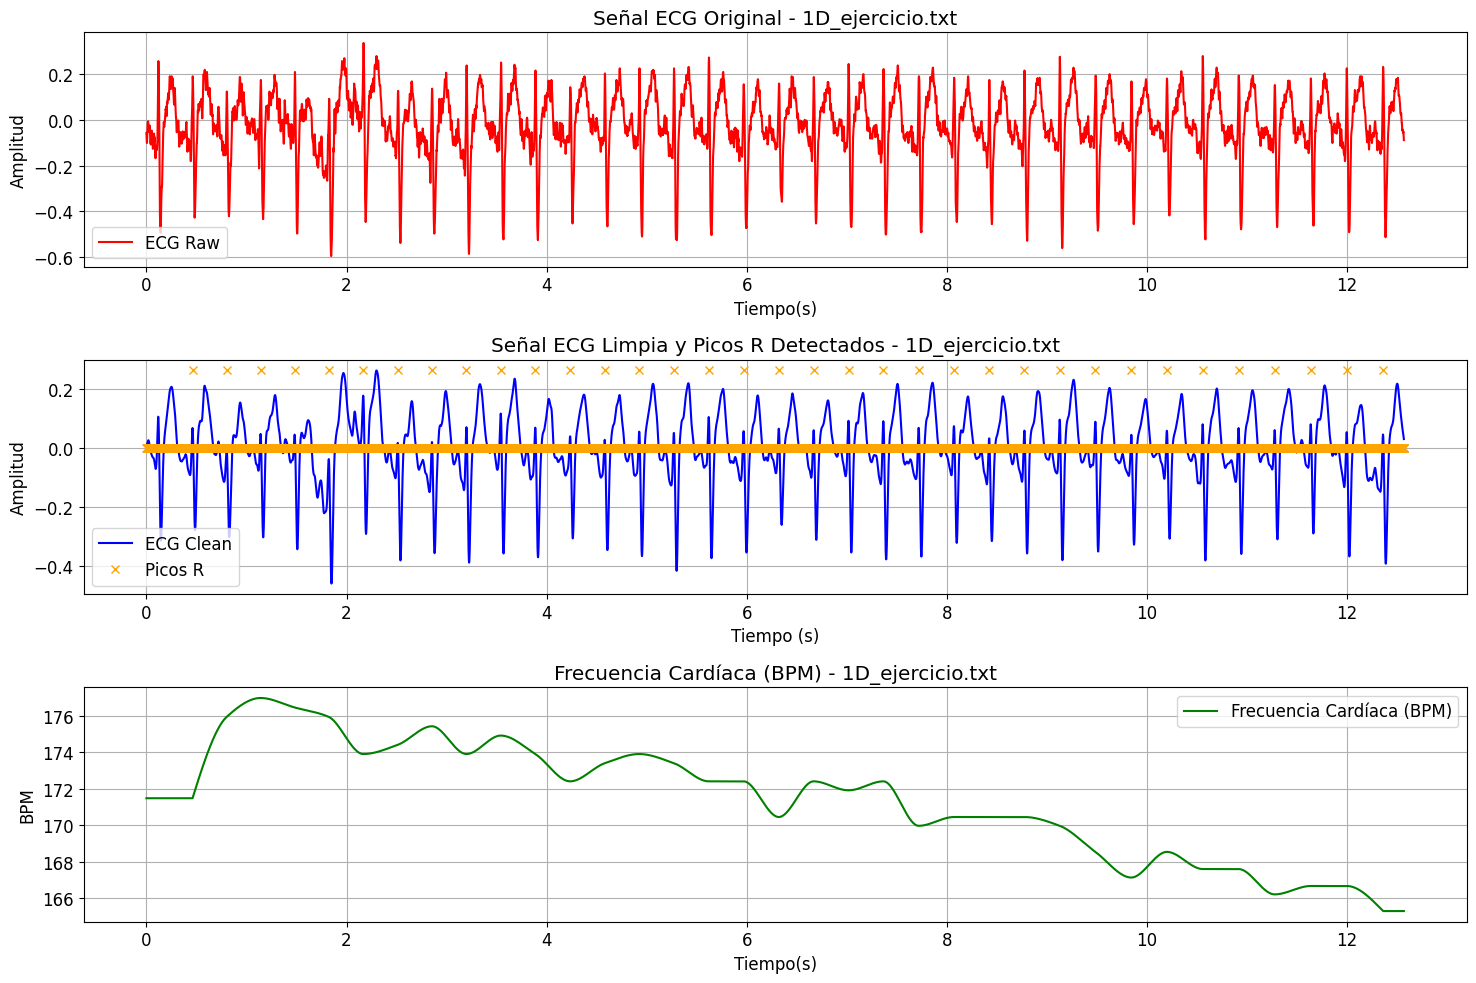

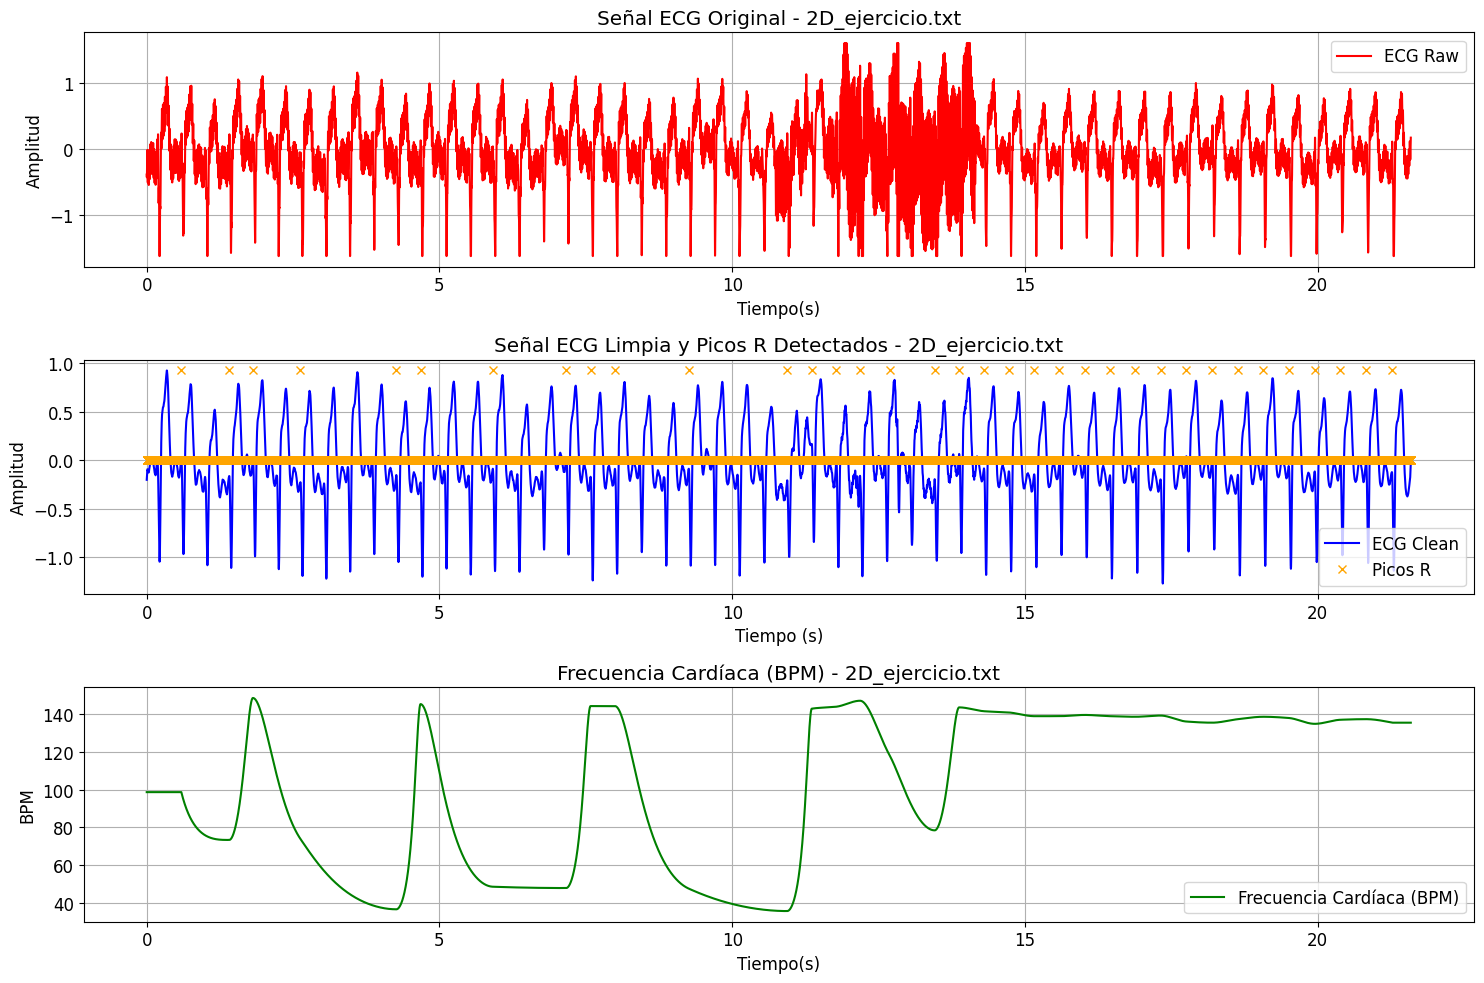

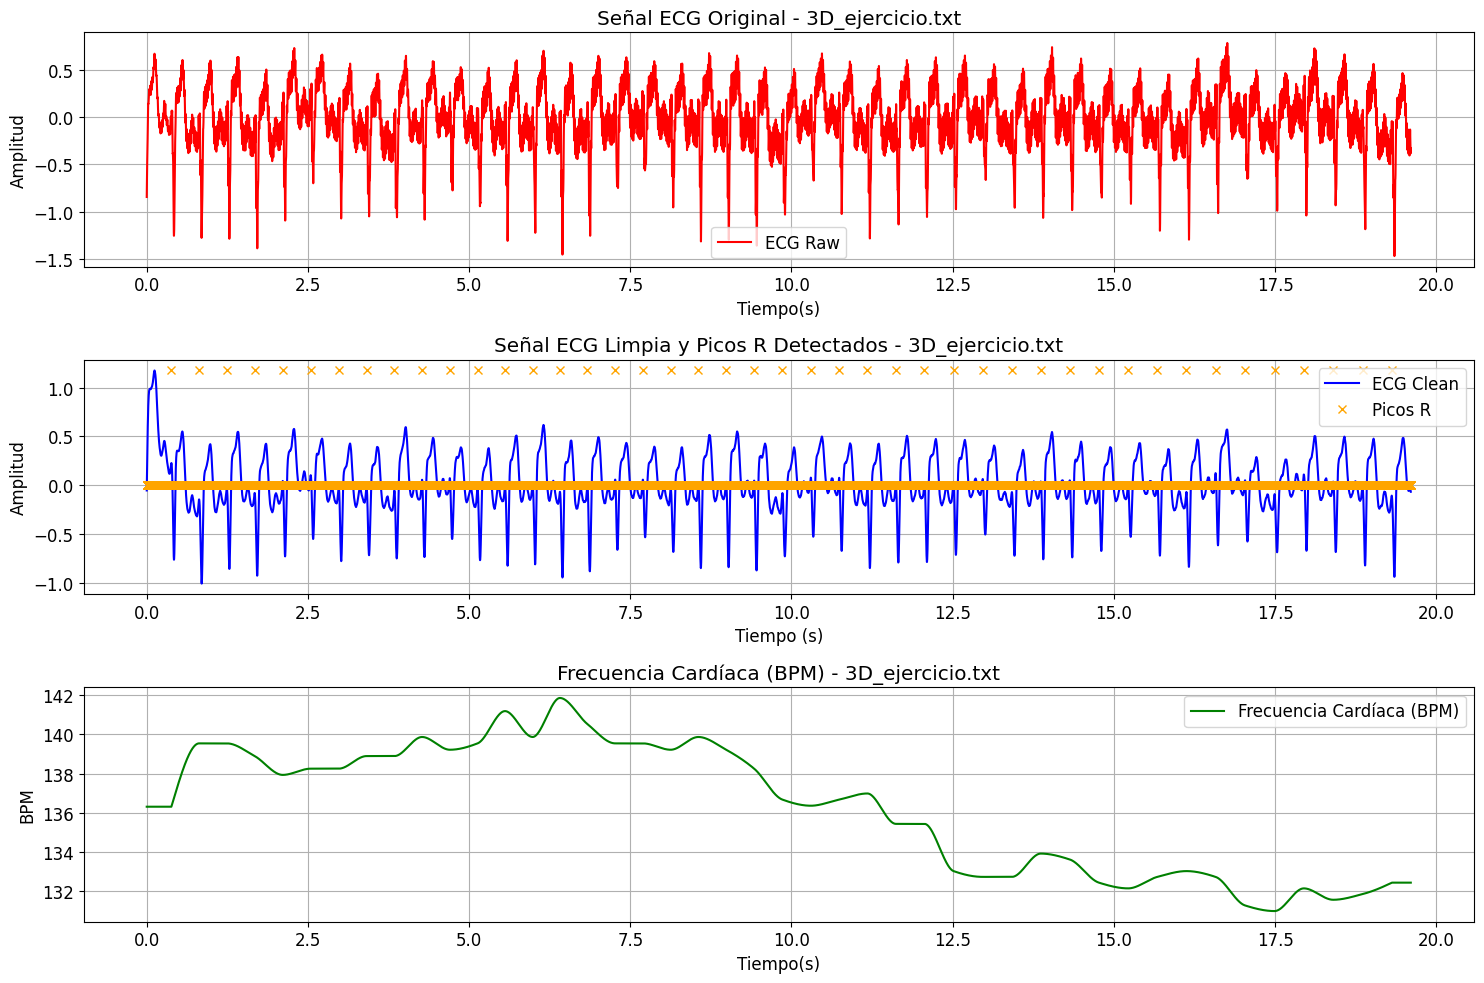

In [20]:
import neurokit2 as nk
import pandas as pd
import matplotlib.pyplot as plt
import os

def main():
    file_paths = [
        "C:/Users/Lenovo/OneDrive/Escritorio/Repositorio ISB/Github/Laboratorios/Laboratorio 10/Data/1.Estado Basal/1D_basal.txt",
        "C:/Users/Lenovo/OneDrive/Escritorio/Repositorio ISB/Github/Laboratorios/Laboratorio 10/Data/1.Estado Basal/2D_basal.txt",
        "C:/Users/Lenovo/OneDrive/Escritorio/Repositorio ISB/Github/Laboratorios/Laboratorio 10/Data/1.Estado Basal/3D_basal.txt",
        "C:/Users/Lenovo/OneDrive/Escritorio/Repositorio ISB/Github/Laboratorios/Laboratorio 10/Data/2.Respiración/1D_respiracion.txt",
        "C:/Users/Lenovo/OneDrive/Escritorio/Repositorio ISB/Github/Laboratorios/Laboratorio 10/Data/2.Respiración/2D_respiracion.txt",
        "C:/Users/Lenovo/OneDrive/Escritorio/Repositorio ISB/Github/Laboratorios/Laboratorio 10/Data/2.Respiración/3D_respiracion.txt",
        "C:/Users/Lenovo/OneDrive/Escritorio/Repositorio ISB/Github/Laboratorios/Laboratorio 10/Data/3.Post_Respiración/1D_post_respiracion.txt",
        "C:/Users/Lenovo/OneDrive/Escritorio/Repositorio ISB/Github/Laboratorios/Laboratorio 10/Data/3.Post_Respiración/2D_post_respiracion.txt",
        "C:/Users/Lenovo/OneDrive/Escritorio/Repositorio ISB/Github/Laboratorios/Laboratorio 10/Data/3.Post_Respiración/3D_post_respiracion.txt",
        "C:/Users/Lenovo/OneDrive/Escritorio/Repositorio ISB/Github/Laboratorios/Laboratorio 10/Data/4.Ejercicio/1D_ejercicio.txt",
        "C:/Users/Lenovo/OneDrive/Escritorio/Repositorio ISB/Github/Laboratorios/Laboratorio 10/Data/4.Ejercicio/2D_ejercicio.txt",
        "C:/Users/Lenovo/OneDrive/Escritorio/Repositorio ISB/Github/Laboratorios/Laboratorio 10/Data/4.Ejercicio/3D_ejercicio.txt"
    ]

    sampling_rate = 1000  # Frecuencia de muestreo en Hz

    for file_path in file_paths:
        try:
            file_name = os.path.basename(file_path)

            # Cargar y procesar la señal de ECG
            ecg_signal = load_ecg_data(file_path)
            # Genera una señal de ECG simulada (puedes reemplazarla con una señal real)
            

            # Paso 1: Limpieza de la señal
            ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=1000)

            # Paso 2: Detección de picos R
            peaks, info_peaks = nk.ecg_peaks(ecg_cleaned, sampling_rate=1000)

            # Paso 3: Cálculo de la frecuencia cardíaca (BPM)
            rate = nk.ecg_rate(peaks, sampling_rate=1000, desired_length=len(ecg_cleaned))

            # Crea un DataFrame con la señal original, la señal limpia, y la frecuencia cardíaca
            signals = pd.DataFrame({
                "ECG_Raw": ecg_signal,
                "ECG_Clean": ecg_cleaned,
                "ECG_Rate": rate
            })
            signals = pd.concat([signals, peaks], axis=1)
            tiempo=np.linspace(0,len(signals["ECG_Clean"])/1000,len(signals["ECG_Clean"]))
            # Gráfica de los resultados
            plt.figure(figsize=(15, 10))

            # Señal de ECG Original
            plt.subplot(3, 1, 1)
            plt.plot(tiempo,signals["ECG_Raw"], label="ECG Raw", color="red")
            plt.title(f"Señal ECG Original - {file_name}")
            plt.xlabel("Tiempo(s)")
            plt.ylabel("Amplitud")
            plt.legend()
            plt.grid()

            # Señal de ECG Limpia
            plt.subplot(3, 1, 2)
            plt.plot(tiempo,signals["ECG_Clean"], label="ECG Clean", color="blue")
            plt.plot(tiempo,signals["ECG_R_Peaks"] * signals["ECG_Clean"].max(), "x", color="orange", label="Picos R")
            #plt.title("Señal ECG Limpia y Picos R Detectados")
            plt.title(f"Señal ECG Limpia y Picos R Detectados - {file_name}")
            plt.xlabel("Tiempo (s)")
            plt.ylabel("Amplitud")
            plt.legend()
            plt.grid()

            # Frecuencia Cardíaca (BPM)
            plt.subplot(3, 1, 3)
            plt.plot(tiempo,signals["ECG_Rate"], label="Frecuencia Cardíaca (BPM)", color="green")
            #plt.title("Frecuencia Cardíaca (BPM)")
            plt.title(f"Frecuencia Cardíaca (BPM) - {file_name}")
            plt.xlabel("Tiempo(s)")
            plt.ylabel("BPM")
            plt.legend()
            plt.grid()

            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error procesando el archivo {file_path}: {e}")

# Ejecutar procesamiento completo
main()

Ploteo de señales ECG ( repositorio ) usando ecg_plot

In [63]:
!pip uninstall ecg_plot -y
!pip install ecg_plot

Found existing installation: ecg-plot 0.2.8
Uninstalling ecg-plot-0.2.8:
  Successfully uninstalled ecg-plot-0.2.8
  Using cached ecg_plot-0.2.8-py3-none-any.whl.metadata (2.3 kB)
Using cached ecg_plot-0.2.8-py3-none-any.whl (9.2 kB)


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Users\\DELL\\Downloads\\tmp\\example_ecg_1.png'

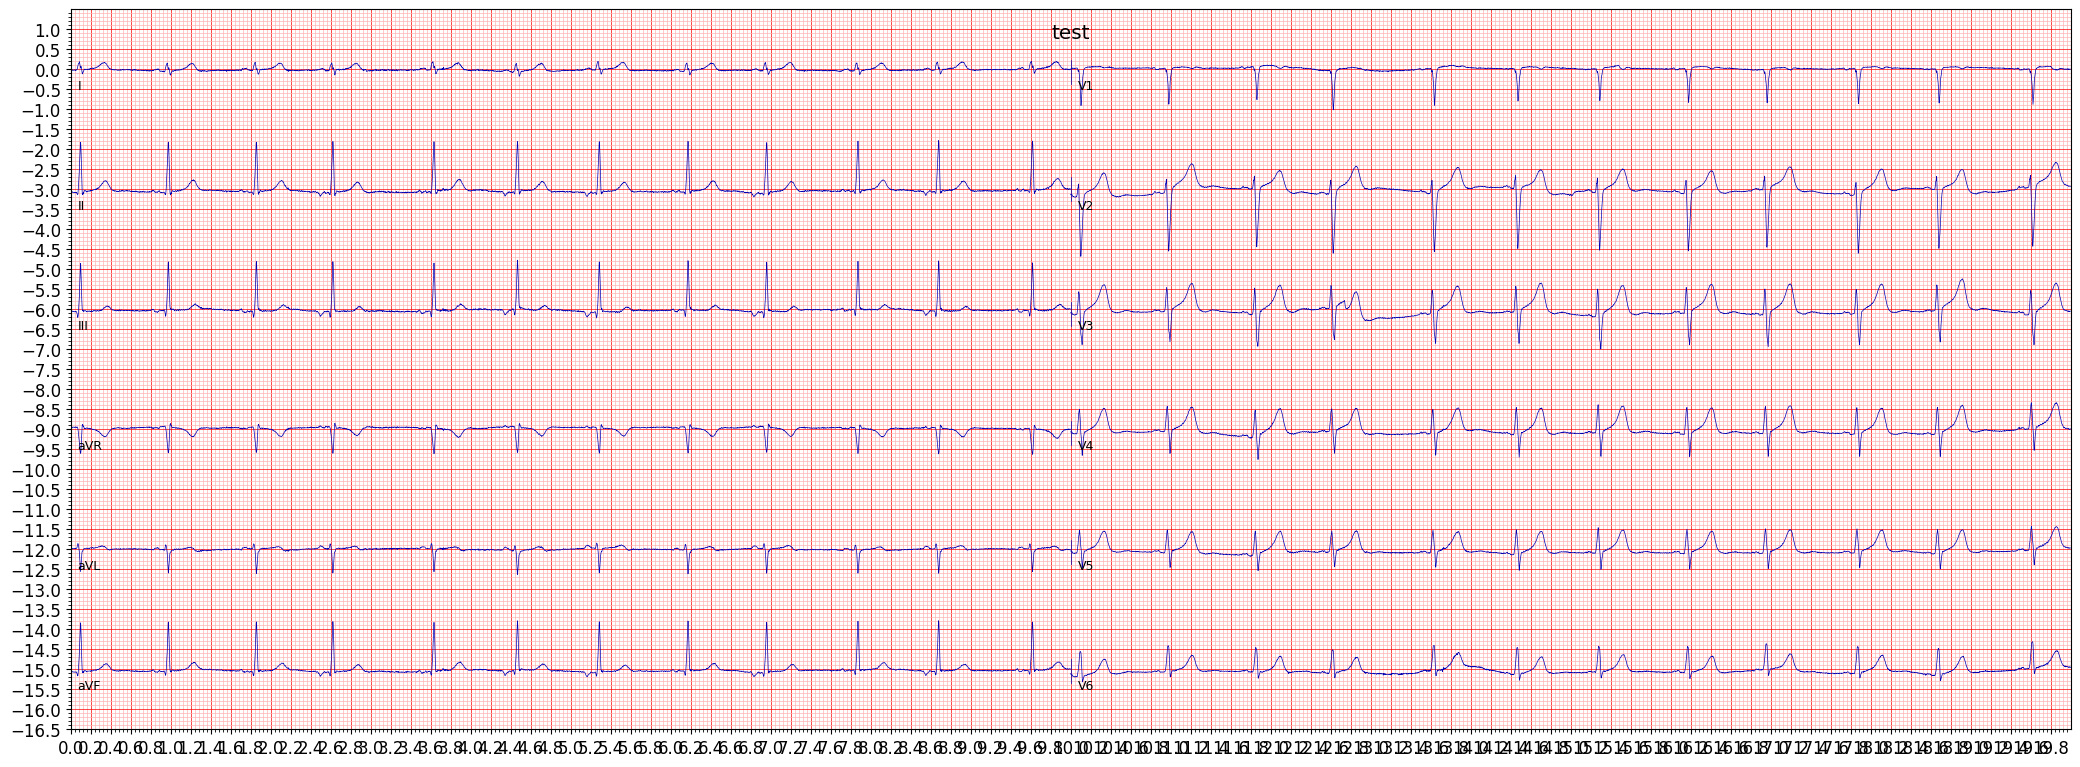

In [66]:
from scipy.io import loadmat
import ecg_plot

def load_ecg_from_mat(file_path):
    mat = loadmat(file_path)
    data = mat["data"]
    feature = data[0:12]
    return(feature)

test_ecg = load_ecg_from_mat('example_ecg.mat')
# ecg_plot.plot_1(test_ecg[1][0:1000])
# ecg_plot.show()
# ecg_plot.plot_12(test_ecg)
# ecg_plot.show()
# ecg_plot.plot_12(test_ecg)
# ecg_plot.save_as_png('example_ecg','tmp/')
# ecg_plot.plot_12(test_ecg)
# ecg_plot.save_as_jpg('example_ecg','tmp/')
# ecg_plot.plot_12(test_ecg)
# ecg_plot.save_as_svg('example_ecg','tmp/')
# ecg_plot.plot_12(test_ecg)
# ecg_plot.show_svg()

# ecg_plot.plot(test_ecg, sample_rate = 500, title = '', columns = 1,show_grid = False, show_lead_name = False, style='bw')
# ecg_plot.plot(test_ecg, sample_rate = 500, title = '', columns = 3)
ecg_plot.plot(test_ecg, title='test')
ecg_plot.save_as_png('example_ecg_1','tmp/')
ecg_plot.show()

Error procesando el archivo D:/ECG/Data/Data/1.Estado Basal/1D_basal.txt: object of type 'numpy.float64' has no len()
Error procesando el archivo D:/ECG/Data/Data/1.Estado Basal/2D_basal.txt: object of type 'numpy.float64' has no len()
Error procesando el archivo D:/ECG/Data/Data/1.Estado Basal/3D_basal.txt: object of type 'numpy.float64' has no len()
Error procesando el archivo D:/ECG/Data/Data/2.Respiración/1D_respiracion.txt: object of type 'numpy.float64' has no len()
Error procesando el archivo D:/ECG/Data/Data/2.Respiración/2D_respiracion.txt: object of type 'numpy.float64' has no len()
Error procesando el archivo D:/ECG/Data/Data/2.Respiración/3D_respiracion.txt: object of type 'numpy.float64' has no len()
Error procesando el archivo D:/ECG/Data/Data/3.Post_Respiración/1D_post_respiracion.txt: object of type 'numpy.float64' has no len()
Error procesando el archivo D:/ECG/Data/Data/3.Post_Respiración/2D_post_respiracion.txt: object of type 'numpy.float64' has no len()
Error proce